<a href="https://colab.research.google.com/github/ksmk247/Stock-Price-Prediction-/blob/main/Stock_Price_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [1]:
!pip install torch-summary
!pip install yfinance

In [2]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import seaborn as sns
import yfinance as yf
import torch.optim as optim
import torch.functional as F
from torchviz import make_dot
from tqdm.notebook import tqdm
from datetime import timedelta
import matplotlib.pyplot as plt
from torchsummary import summary
from IPython.display import Image
import plotly.graph_objects as go
from keras.utils import plot_model
from keras.models import Sequential
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout

In [3]:
tck = yf.Ticker("GOOG")
# defining the start date
start_date = "2016-06-14"
# historical data
df = tck.history(start=start_date, end=None)
df

Open        High         Low       Close  \
Date                                                                        
2016-06-14 00:00:00-04:00   35.612315   35.910045   35.445304   35.701286   
2016-06-15 00:00:00-04:00   35.737571   35.935393   35.653571   35.733593   
2016-06-16 00:00:00-04:00   35.534277   35.620765   34.955219   35.308125   
2016-06-17 00:00:00-04:00   35.223128   35.231581   34.219197   34.381630   
2016-06-20 00:00:00-04:00   34.732048   34.916453   34.465634   34.480545   
...                               ...         ...         ...         ...   
2025-07-21 00:00:00-04:00  187.100006  191.259995  187.050003  191.149994   
2025-07-22 00:00:00-04:00  192.419998  193.360001  188.494995  192.110001   
2025-07-23 00:00:00-04:00  192.360001  193.360001  190.179993  191.509995   
2025-07-24 00:00:00-04:00  198.110001  198.970001  191.949997  193.199997   
2025-07-25 00:00:00-04:00  192.929993  195.274994  192.130005  194.080002   

                             Volume  Dividends  Stock Splits  
Date                                                          
2016-06-14 00:00:00-04:00  26122000        0.0           0.0  
2016-06-15 00:00:00-04:00  24290000        0.0           0.0  
2016-06-16 00:00:00-04:00  39650000        0.0           0.0  
2016-06-17 00:00:00-04:00  68048000        0.0           0.0  
2016-06-20 00:00:00-04:00  41650000        0.0           0.0  
...                             ...        ...           ...  
2025-07-21 00:00:00-04:00  24665000        0.0           0.0  
2025-07-22 00:00:00-04:00  26212900        0.0           0.0  
2025-07-23 00:00:00-04:00  34068100        0.0           0.0  
2025-07-24 00:00:00-04:00  45252100        0.0           0.0  
2025-07-25 00:00:00-04:00  31082500        0.0           0.0  

[2292 rows x 7 columns]

In [4]:
col_close = df.pop('Close')
df.insert(0, 'Close', col_close)
df.head()

Close       Open       High        Low  \
Date                                                                    
2016-06-14 00:00:00-04:00  35.701286  35.612315  35.910045  35.445304   
2016-06-15 00:00:00-04:00  35.733593  35.737571  35.935393  35.653571   
2016-06-16 00:00:00-04:00  35.308125  35.534277  35.620765  34.955219   
2016-06-17 00:00:00-04:00  34.381630  35.223128  35.231581  34.219197   
2016-06-20 00:00:00-04:00  34.480545  34.732048  34.916453  34.465634   

                             Volume  Dividends  Stock Splits  
Date                                                          
2016-06-14 00:00:00-04:00  26122000        0.0           0.0  
2016-06-15 00:00:00-04:00  24290000        0.0           0.0  
2016-06-16 00:00:00-04:00  39650000        0.0           0.0  
2016-06-17 00:00:00-04:00  68048000        0.0           0.0  
2016-06-20 00:00:00-04:00  41650000        0.0           0.0

In [5]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [6]:
columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

In [7]:
df.shape

(2292, 7)

In [8]:
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())
check_df(df)


Shape
(2292, 7)

Types
Close           float64
Open            float64
High            float64
Low             float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

NANs
Close           0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2016-06-14 00:00:00-04:00 to 2025-07-25 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         2292 non-null   float64
 1   Open          2292 non-null   float64
 2   High          2292 non-null   float64
 3   Low           2292 non-null   float64
 4   Volume        2292 non-null   int64  
 5   Dividends     2292 non-null   float64
 6   Stock Splits  2292 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 143.2 KB
None


In [9]:
df['Volume'] = df['Volume'].astype('float64')

In [10]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))

Number of duplicated rows:  0


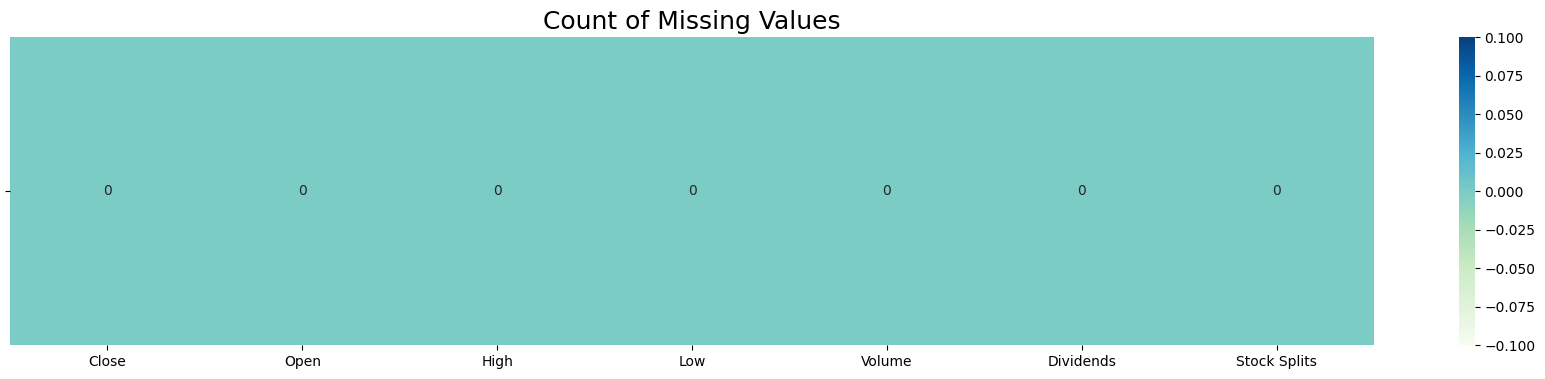

In [11]:
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count of Missing Values', fontsize=18)
plt.show()

In [12]:
df.describe().T.style.background_gradient(cmap='GnBu', axis=1)

In [13]:
df.apply(lambda x: len(x.unique()))

Close           2257
Open            2292
High            2291
Low             2292
Volume          2225
Dividends          3
Stock Splits       2
dtype: int64

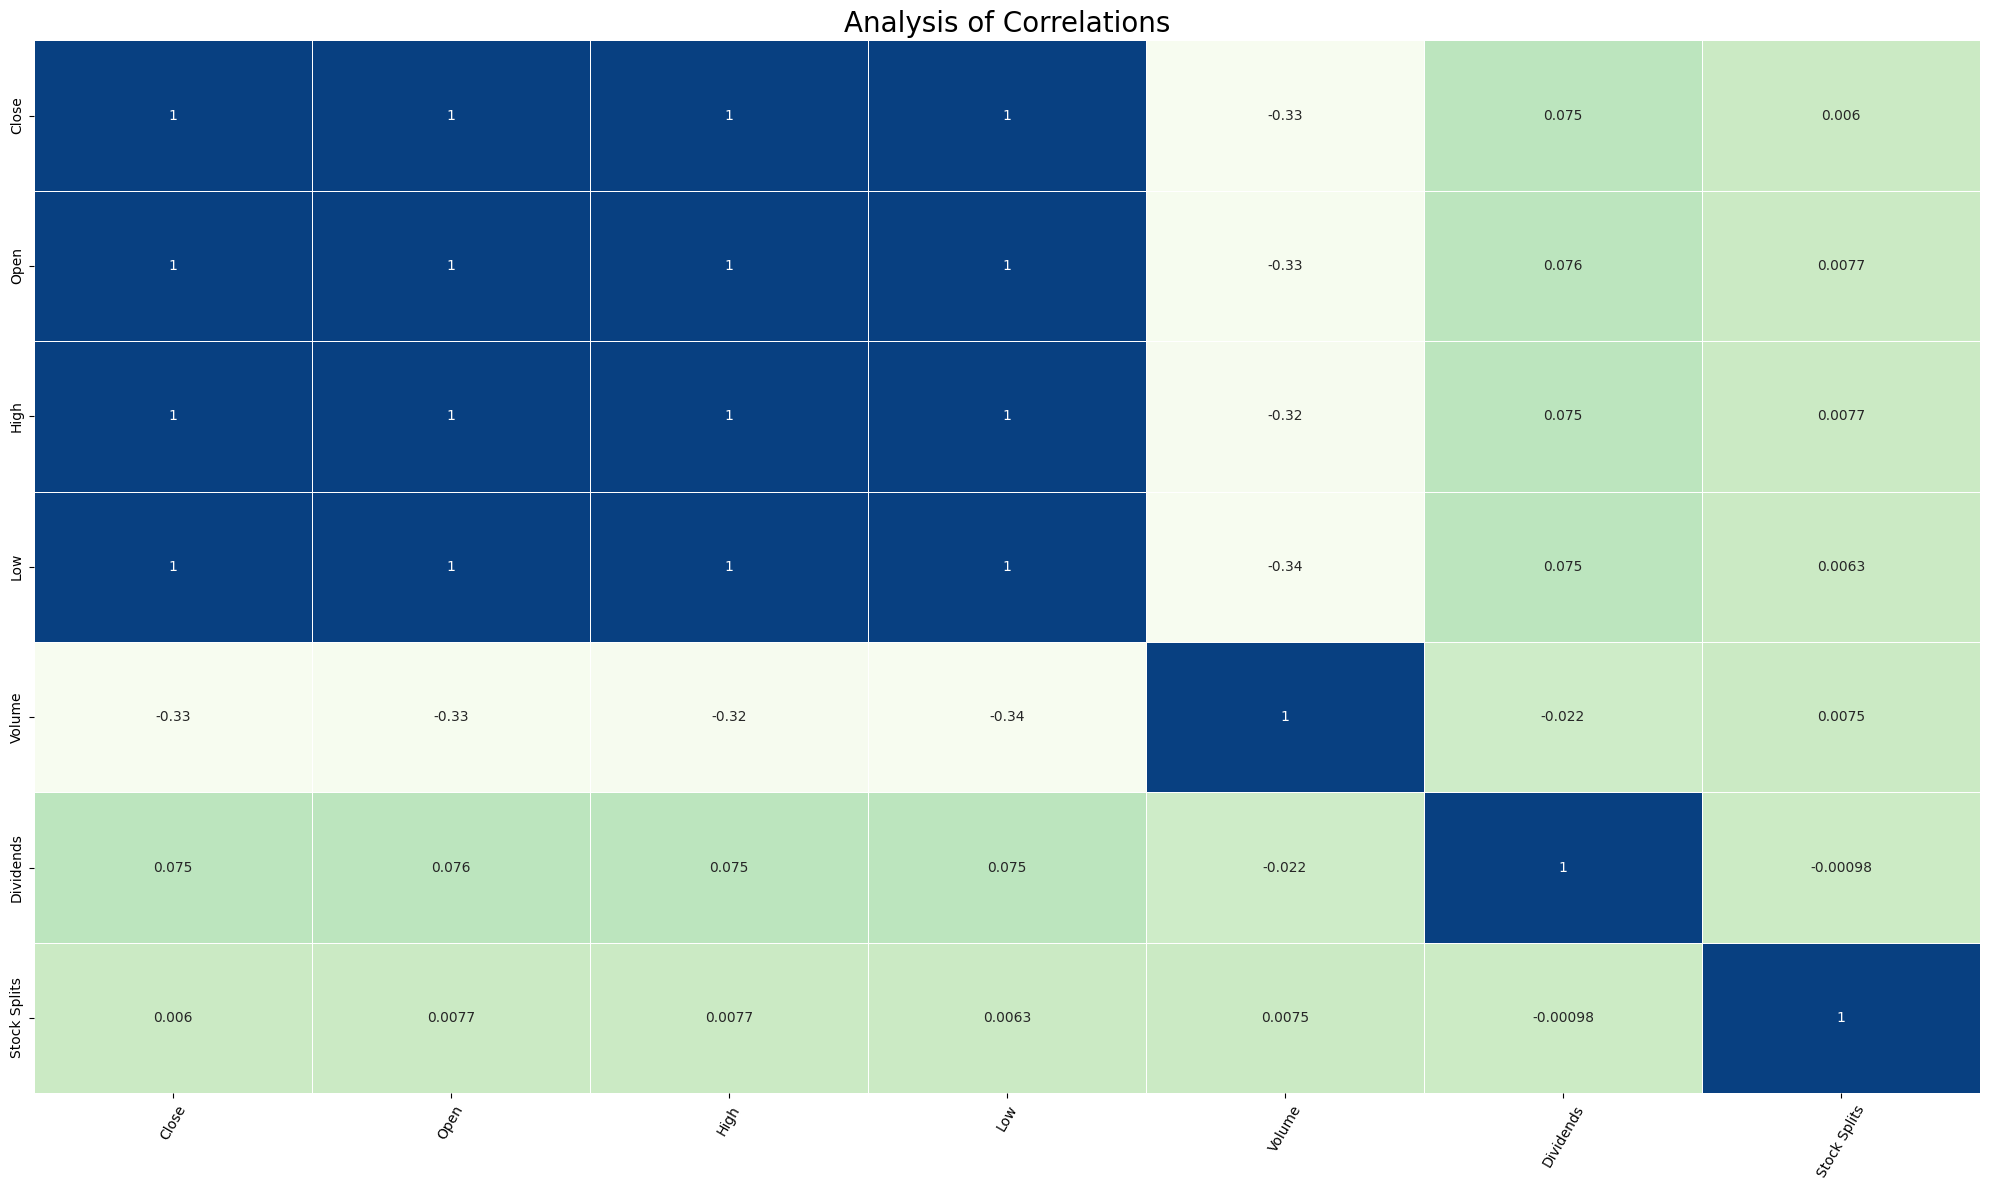

In [14]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), cmap="GnBu", annot=True, linewidths=.6 , cbar = False)
plt.xticks(rotation=60, size=10)
plt.yticks(size=10)
plt.title('Analysis of Correlations', size=20)
plt.tight_layout()
plt.show()

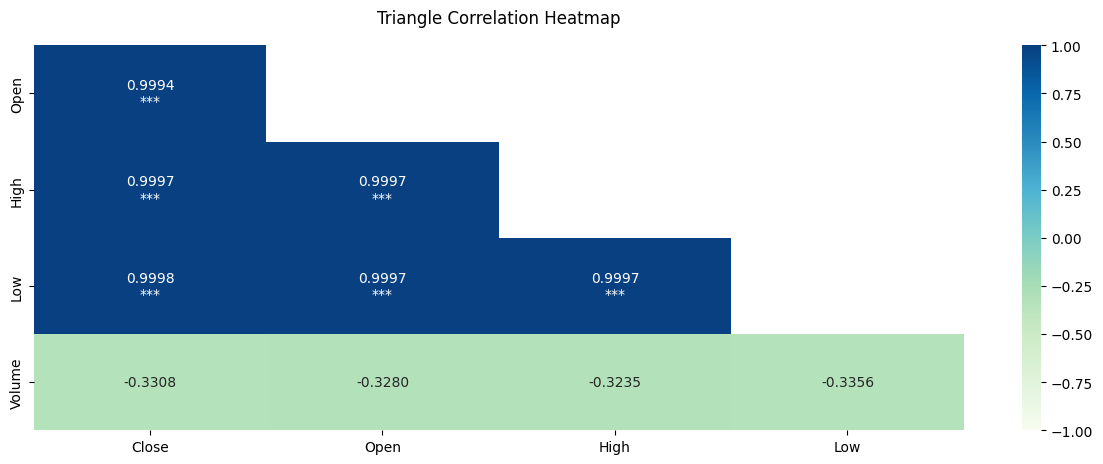

In [15]:
corr = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.25
extreme_1 = 0.5
extreme_2 = 0.75
extreme_3 = 0.9
mask |= np.abs(corr) < cut_off
corr = corr[~mask]
remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n*')
          + ('' if abs(val) < extreme_2 else '*')
          + ('' if abs(val) < extreme_3 else '*')
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='GnBu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 12}, pad=16)
plt.show()

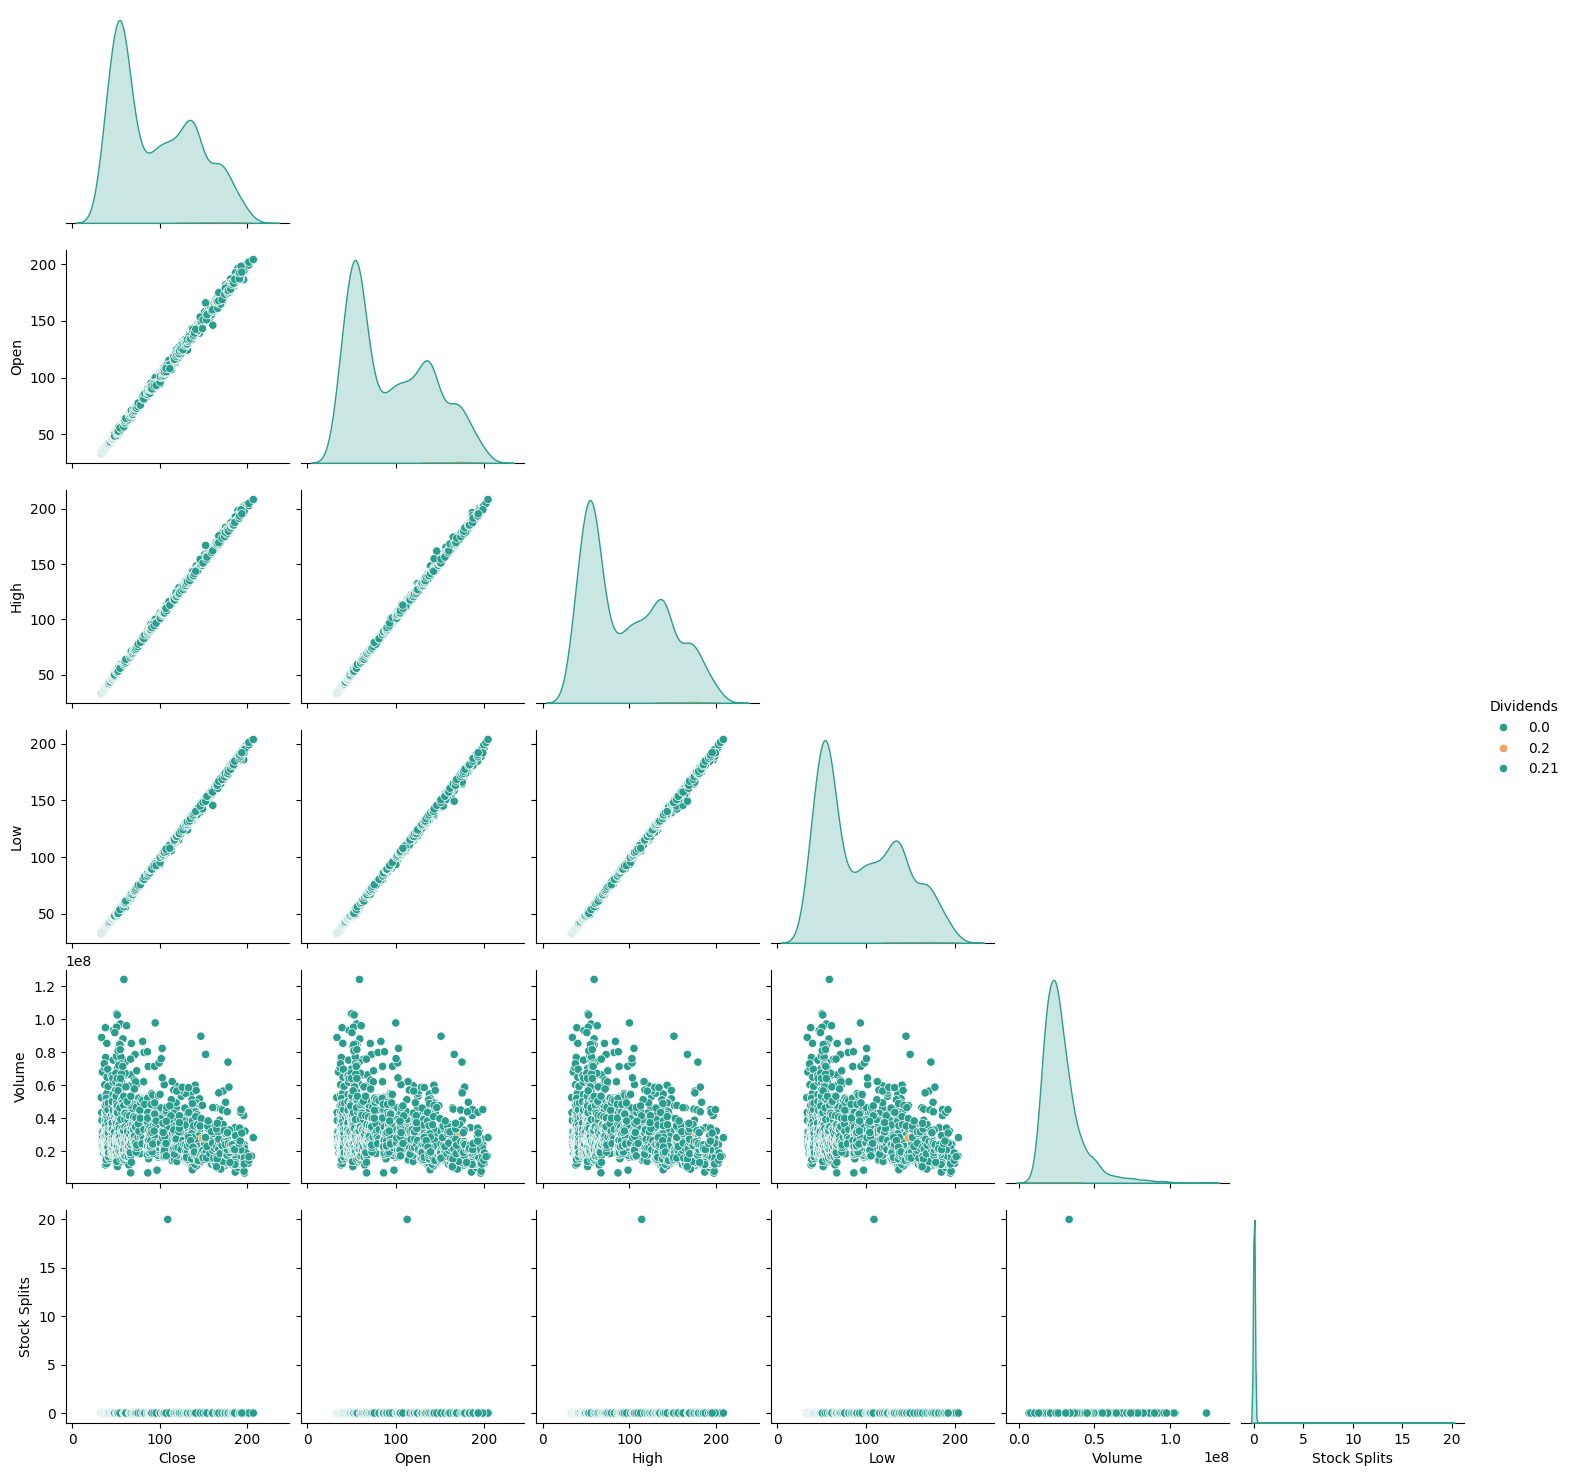

In [16]:
import warnings
warnings.filterwarnings('ignore')
custom_palette = sns.color_palette(['#2a9d8f', '#f4a261'])
sns.pairplot(data=df, diag_kind='kde', hue='Dividends', palette=custom_palette,corner=True)
plt.gcf().set_facecolor('#ffffff')
plt.show()

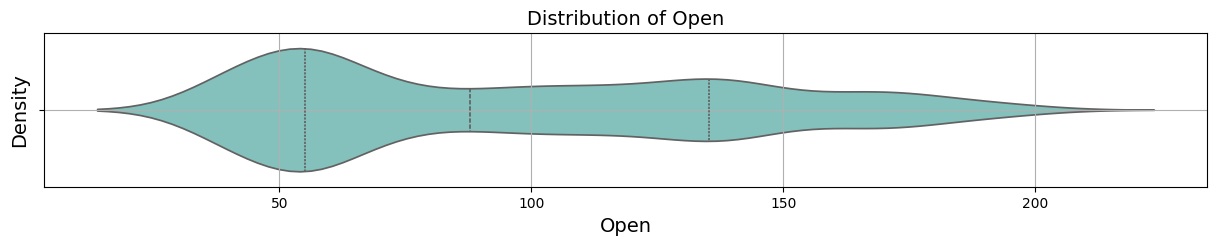

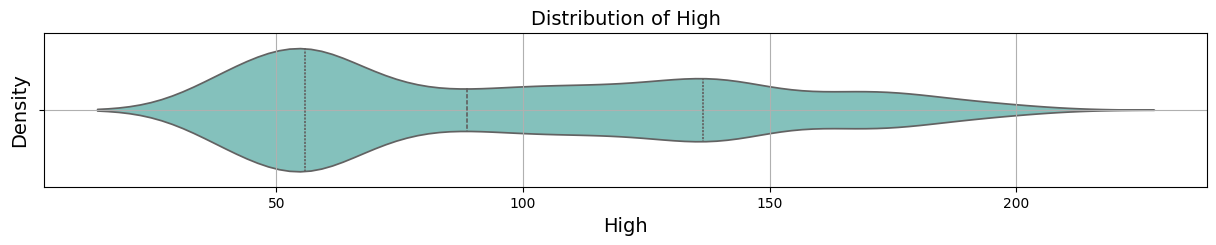

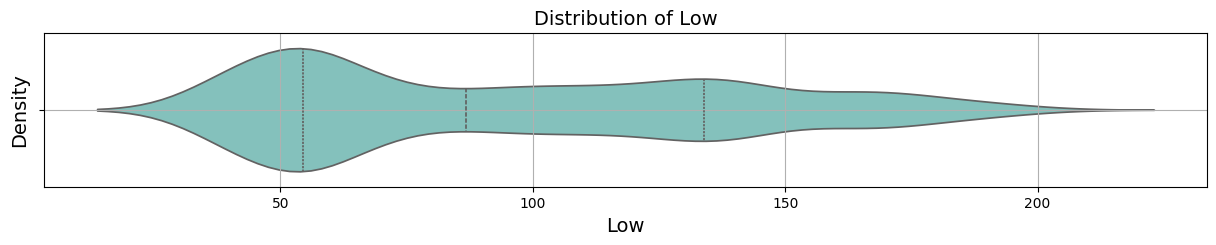

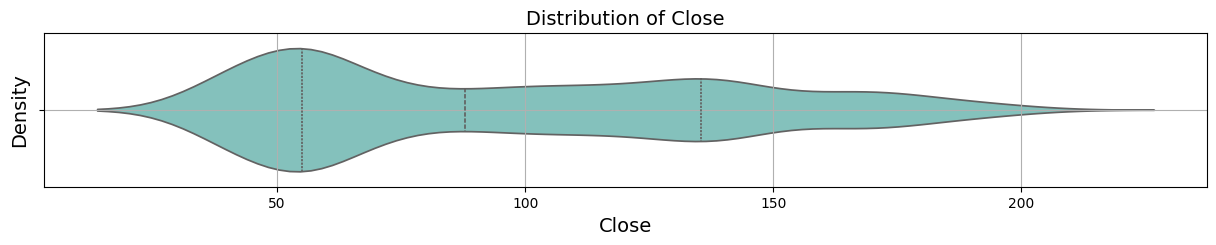

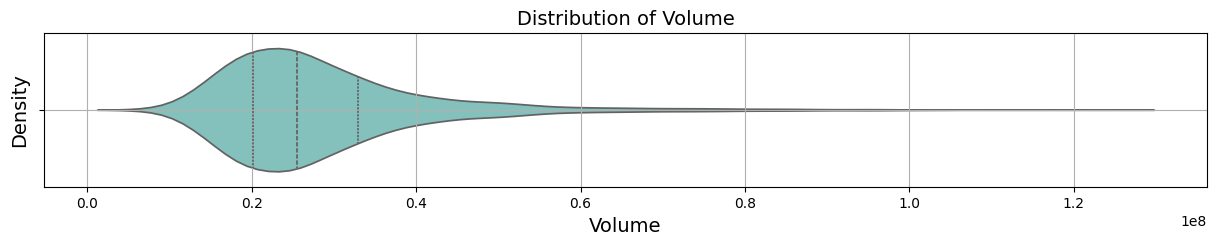

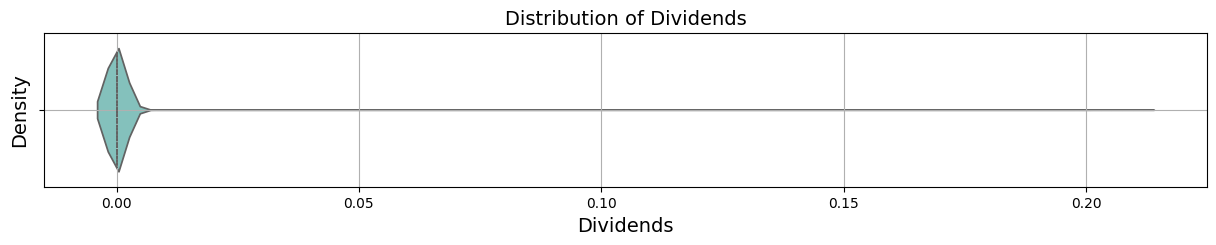

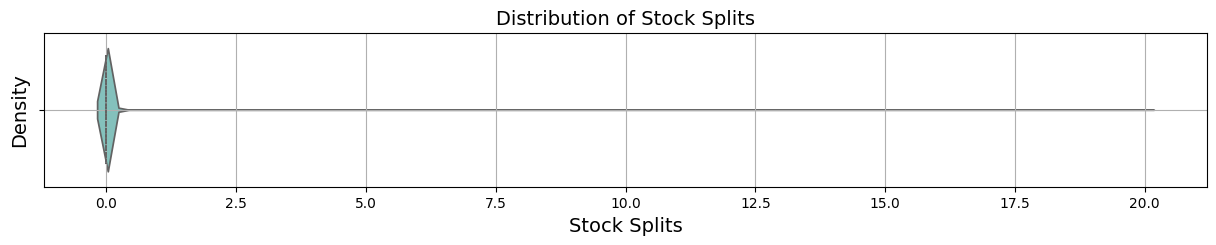

In [17]:
palette = "GnBu"
for column in columns:
    plt.figure(figsize=(15, 2))
    sns.violinplot(x=df[column], palette=palette, inner="quartile")
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(True)
    plt.show()

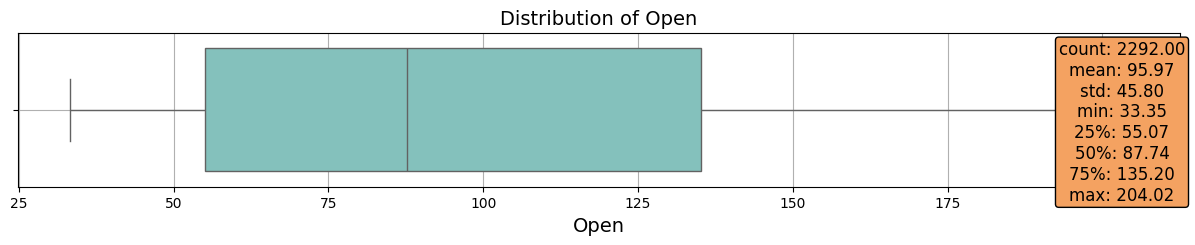

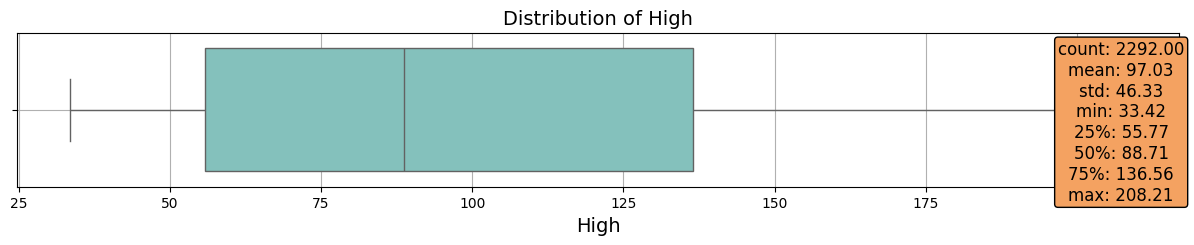

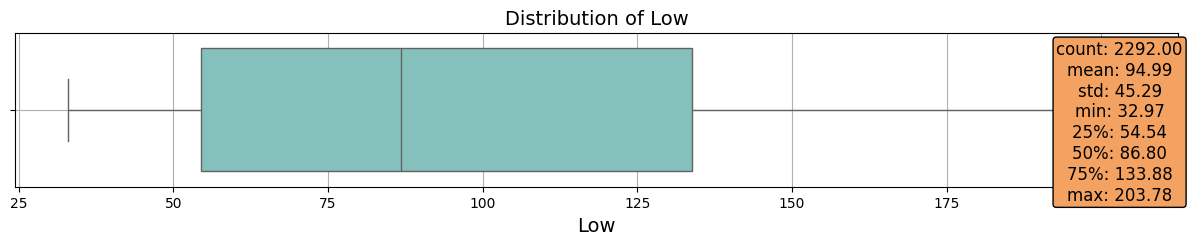

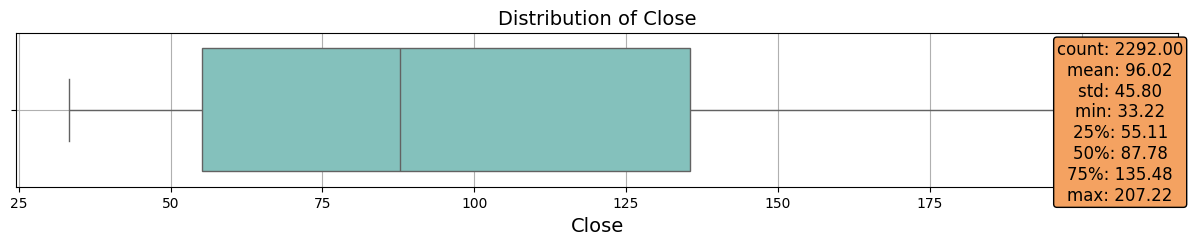

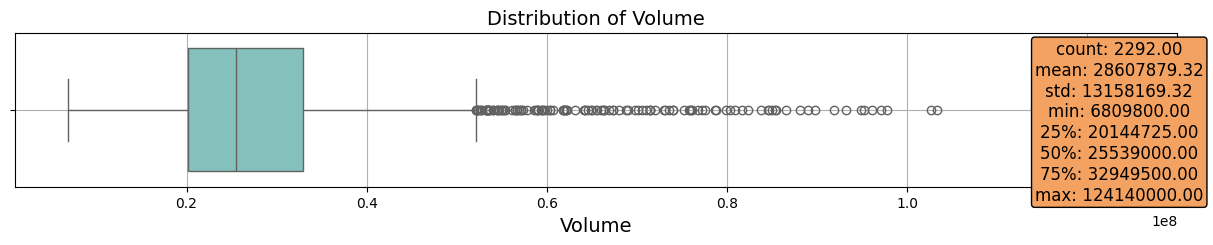

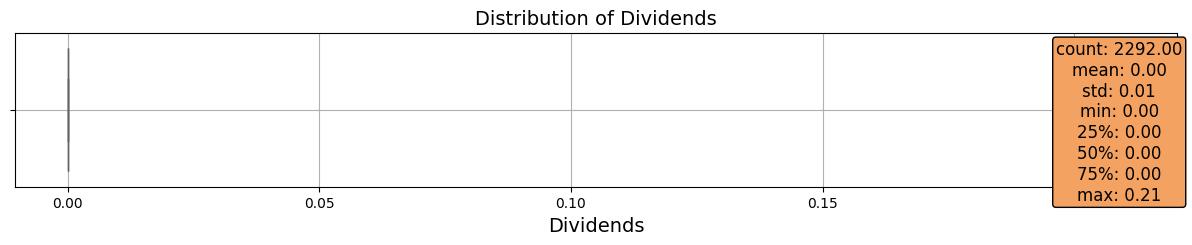

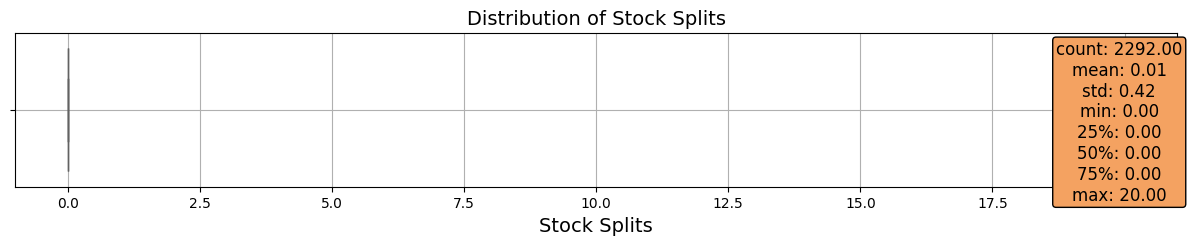

In [18]:
palette = "GnBu"
for column in columns:
    plt.figure(figsize=(15, 2))
    sns.boxplot(x=df[column], palette=palette)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=14)
    stats = df[column].describe()
    stats_text = "\n".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top',
             horizontalalignment='center', bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='#f4a261'))
    plt.grid(True)
    plt.show()

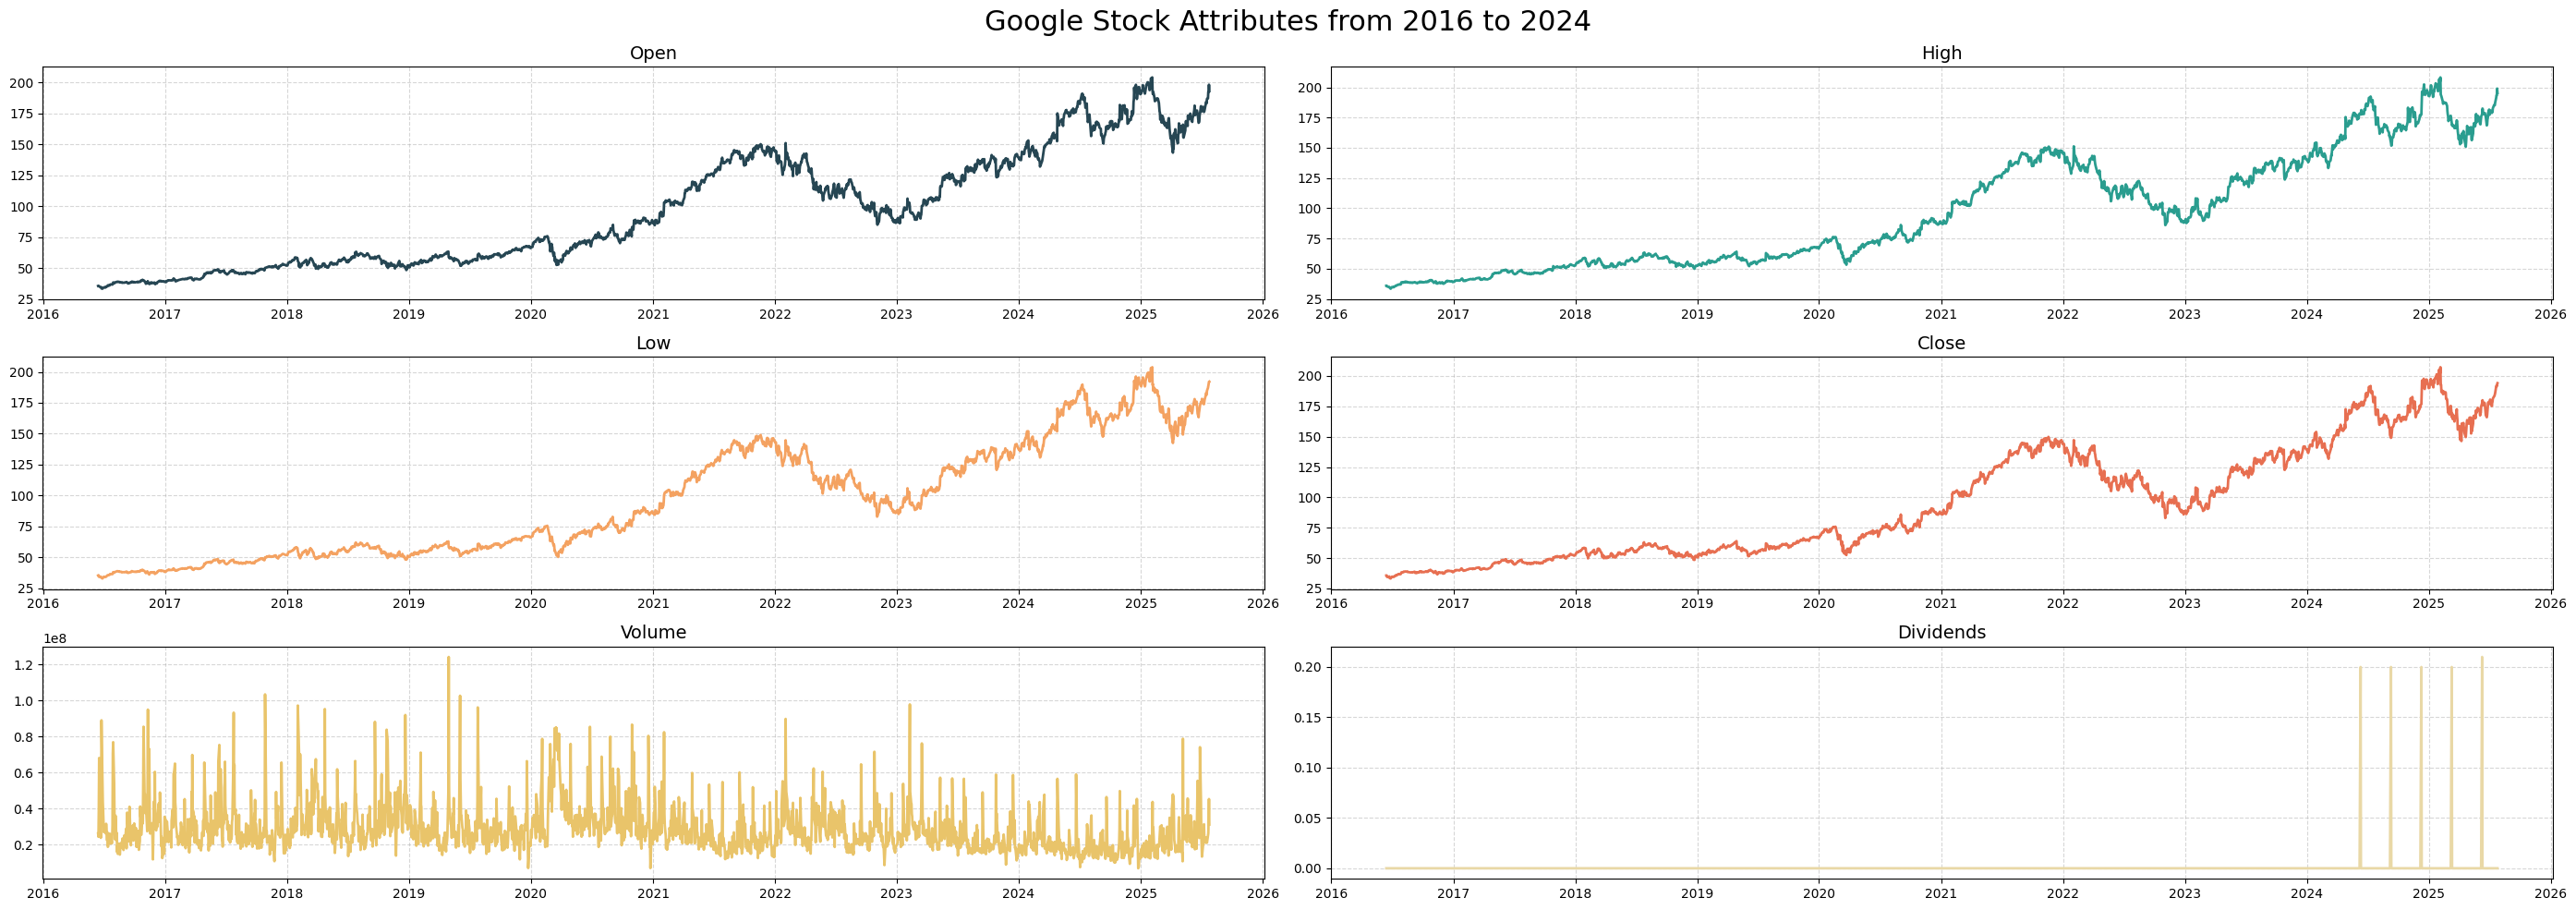

In [19]:
import matplotlib.pyplot as plt
x=df.index
colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51','#e9c46a', '#e9d8a6']
plt.figure(figsize=(28, 10))
plt.subplot(3, 2, 1)
plt.plot(x, df['Open'], color=colors[0], linewidth=2)
plt.title('Open', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 2)
plt.plot(x, df['High'], color=colors[1], linewidth=2)
plt.title('High', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 3)
plt.plot(x, df['Low'], color=colors[2], linewidth=2)
plt.title('Low', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 4)
plt.plot(x, df['Close'], color=colors[3], linewidth=2)
plt.title('Close', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 5)
plt.plot(x, df['Volume'], color=colors[4], linewidth=2)
plt.title('Volume', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 6)
plt.plot(x, df['Dividends'], color=colors[5], linewidth=2)
plt.title('Dividends', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.suptitle('Google Stock Attributes from 2016 to 2024', fontsize=22, y=0.98)
plt.tight_layout()
plt.show()

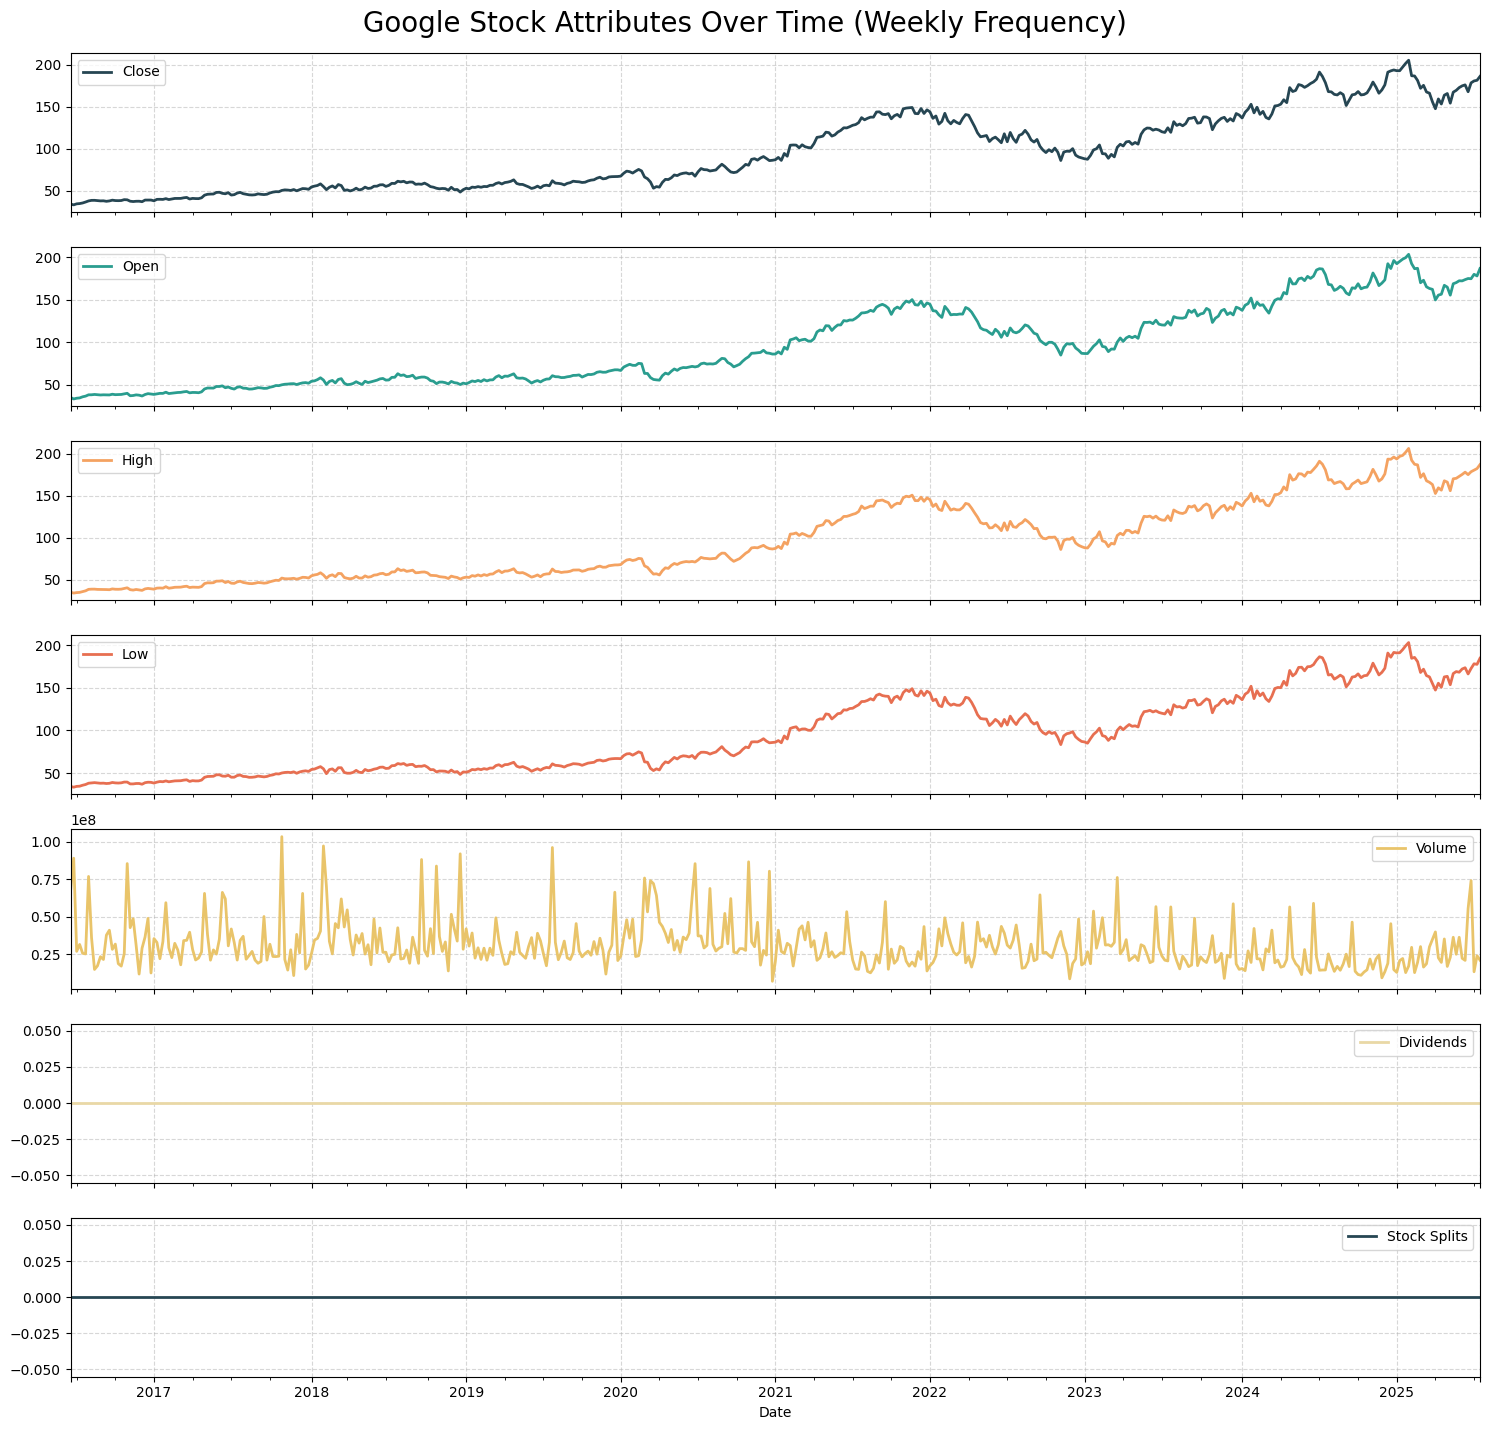

In [20]:
colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51', '#e9c46a', '#e9d8a6']
df_weekly = df.asfreq('W', method='ffill')
df_weekly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle('Google Stock Attributes Over Time (Weekly Frequency)', fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

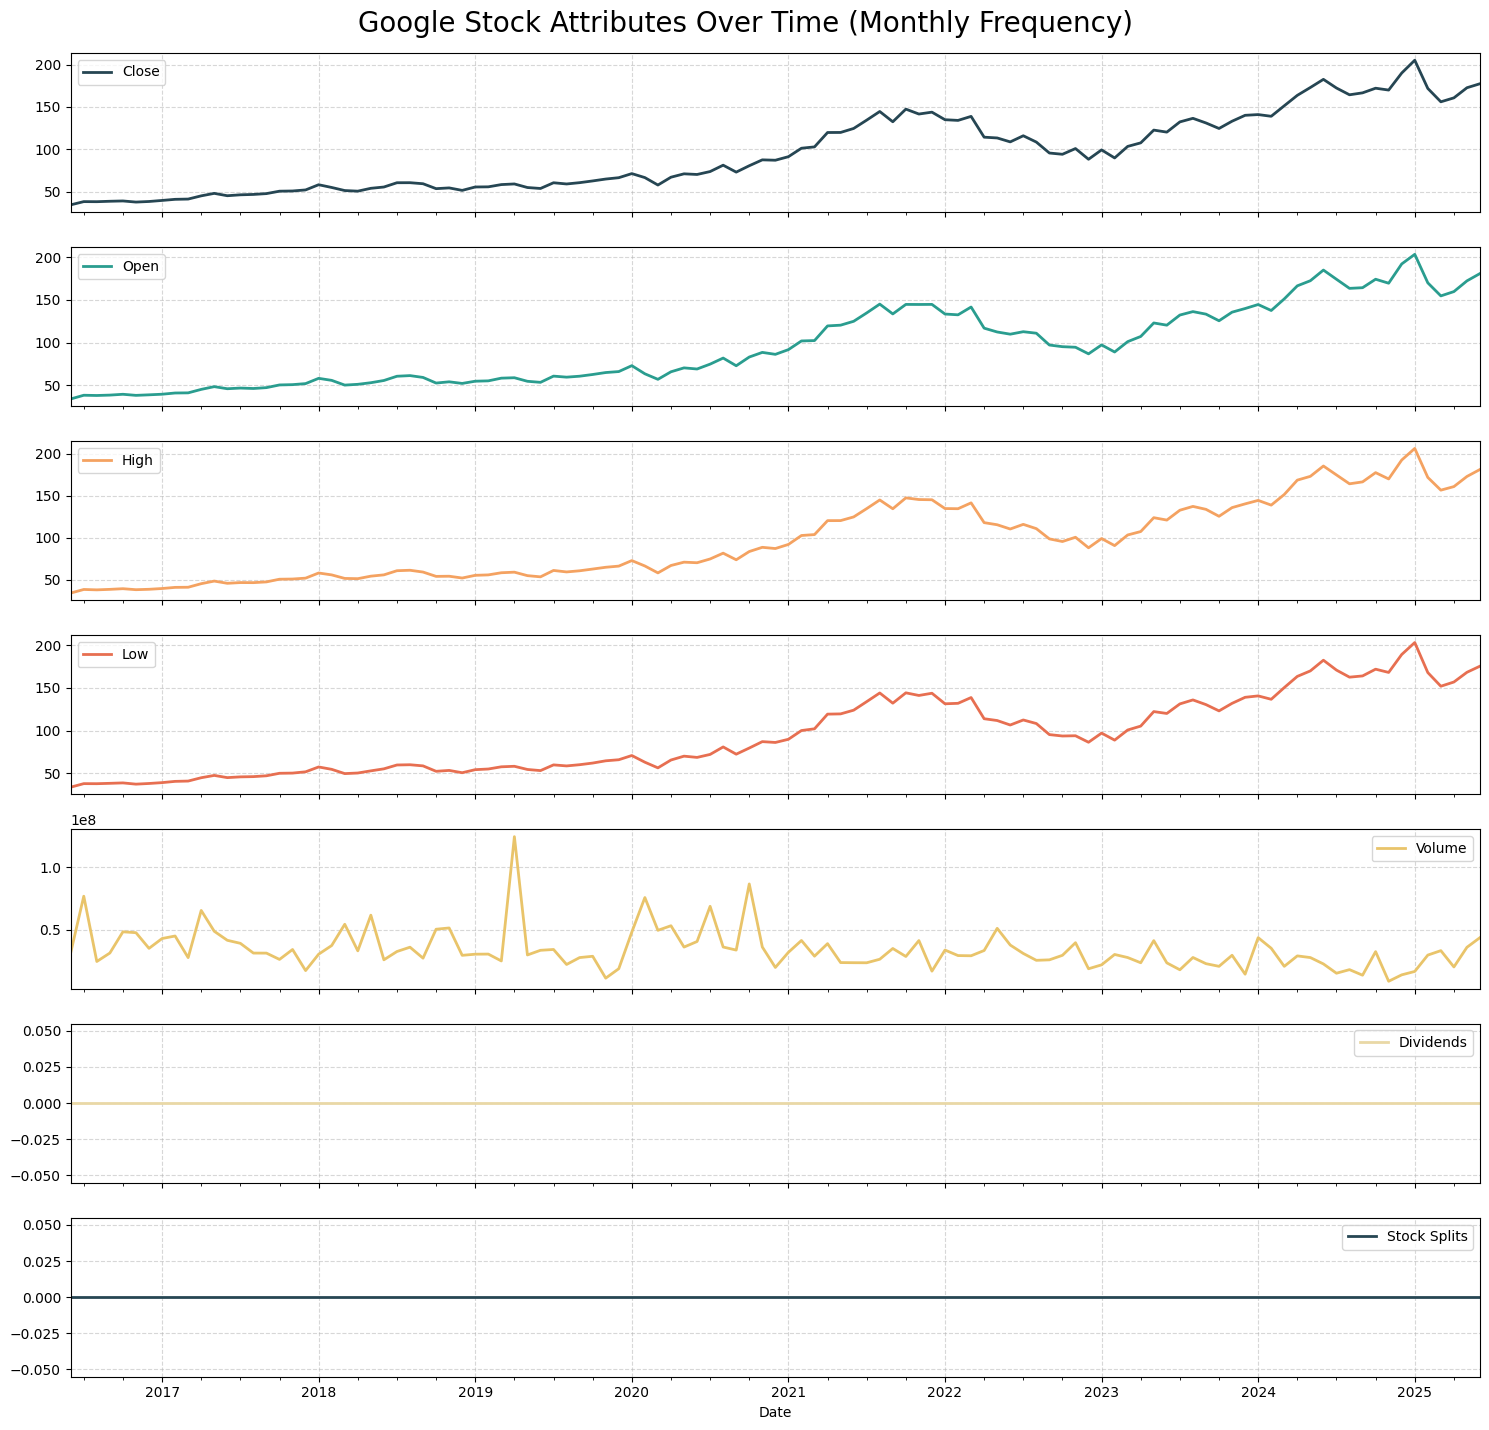

In [21]:
colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51', '#e9c46a', '#e9d8a6']
df_weekly = df.asfreq('M', method='ffill')
df_weekly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle('Google Stock Attributes Over Time (Monthly Frequency)', fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [22]:
candletrace = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick',
    increasing=dict(line=dict(color='#2a9d8f')),
    decreasing=dict(line=dict(color='#f4a261')))
# layout for the chart with custom colors
layout = go.Layout(
    title='GOOG Candlestick Chart',
    xaxis=dict(title='Date', color='#2a9d8f'),
    yaxis=dict(title='Price', color='#2a9d8f', rangemode='normal'),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(255,255,255,0.85)')  # slight transparency on paper background)
# creating the figure
fig = go.Figure(data=[candletrace], layout=layout)
# removing the range slider and showing the figure
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

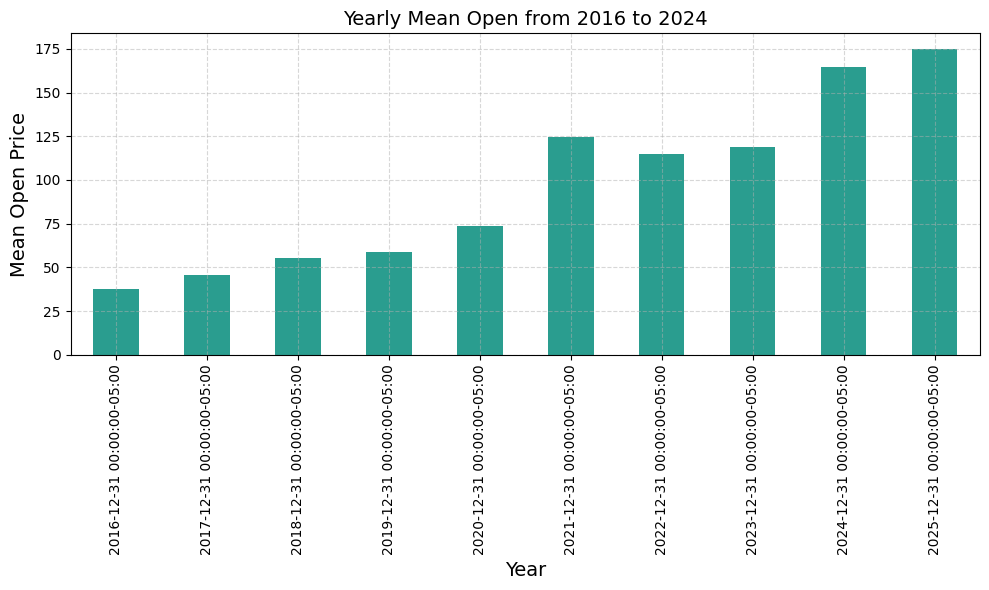

In [23]:
import math
import yfinance as yf
import datetime as dt
# Resampling the 'Open' data by year-end and plotting the mean values
plt.figure(figsize=(10, 6))  # Set figure size
df['Open'].resample('A').mean().plot(kind='bar', color='#2a9d8f')  # Updated color
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14)  # Title with larger font
plt.xlabel('Year', fontsize=14)  # X-axis label with larger font
plt.ylabel('Mean Open Price', fontsize=14)  # Y-axis label with larger font
plt.grid(True, linestyle='--', alpha=0.5)  # Grid with dashed lines
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

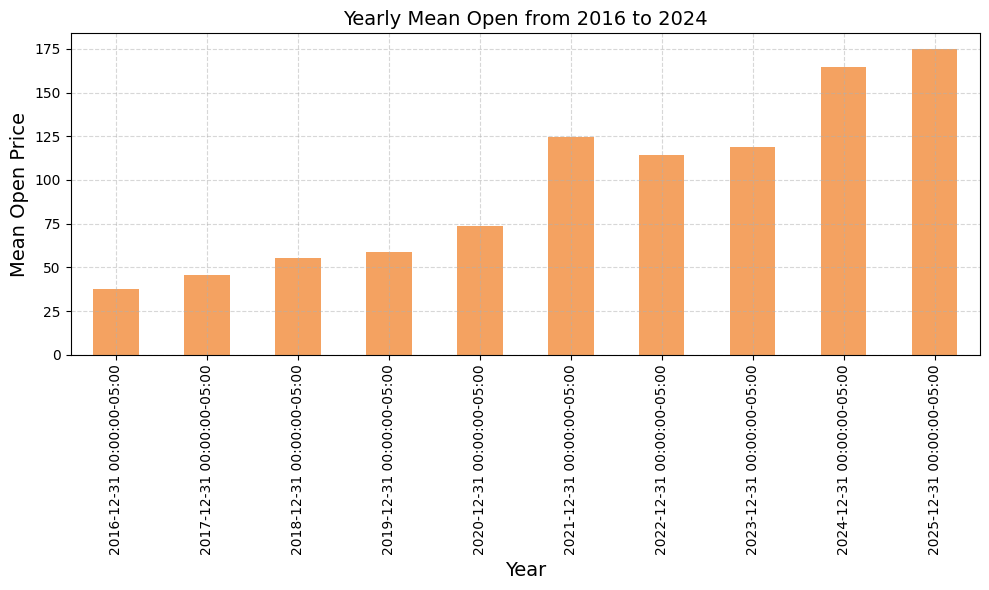

In [24]:
plt.figure(figsize=(10, 6))
df['Close'].resample('A').mean().plot(kind='bar', color='#f4a261')
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Open Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

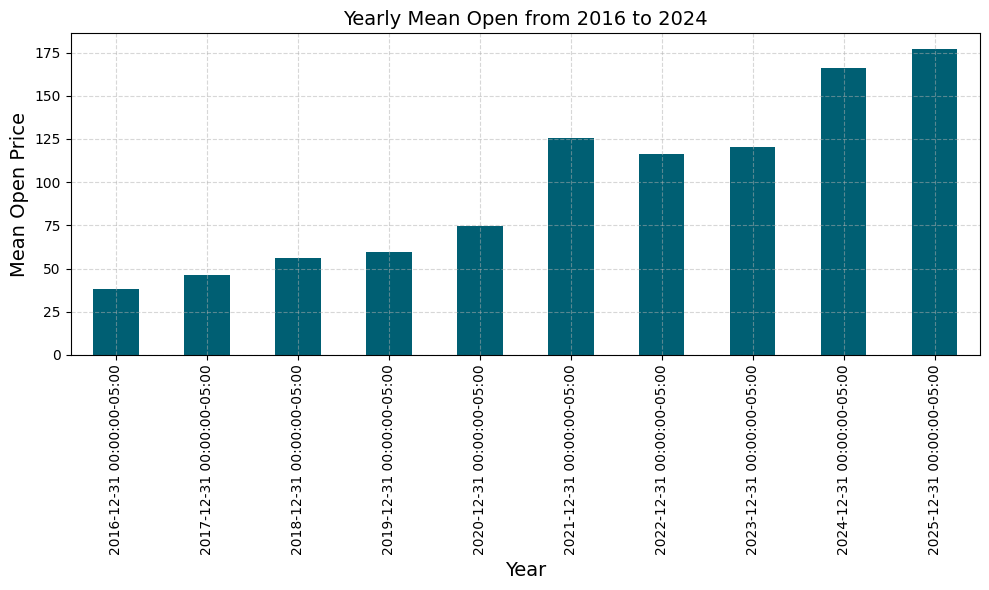

In [25]:
plt.figure(figsize=(10, 6))
df['High'].resample('A').mean().plot(kind='bar', color='#005f73')
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Open Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

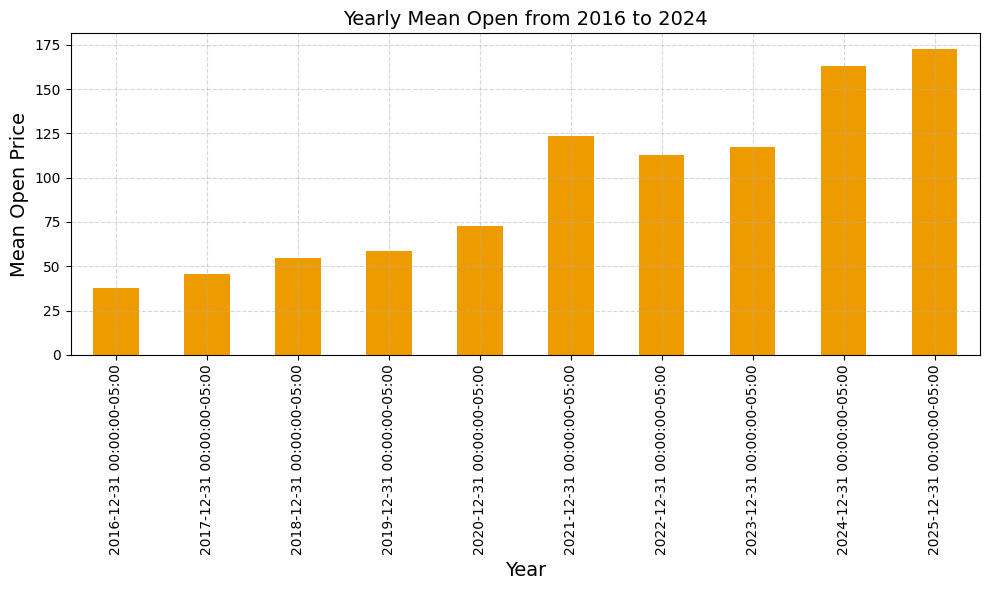

In [26]:
plt.figure(figsize=(10, 6))
df['Low'].resample('A').mean().plot(kind='bar', color='#ee9b00')
plt.title('Yearly Mean Open from 2016 to 2024', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Open Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

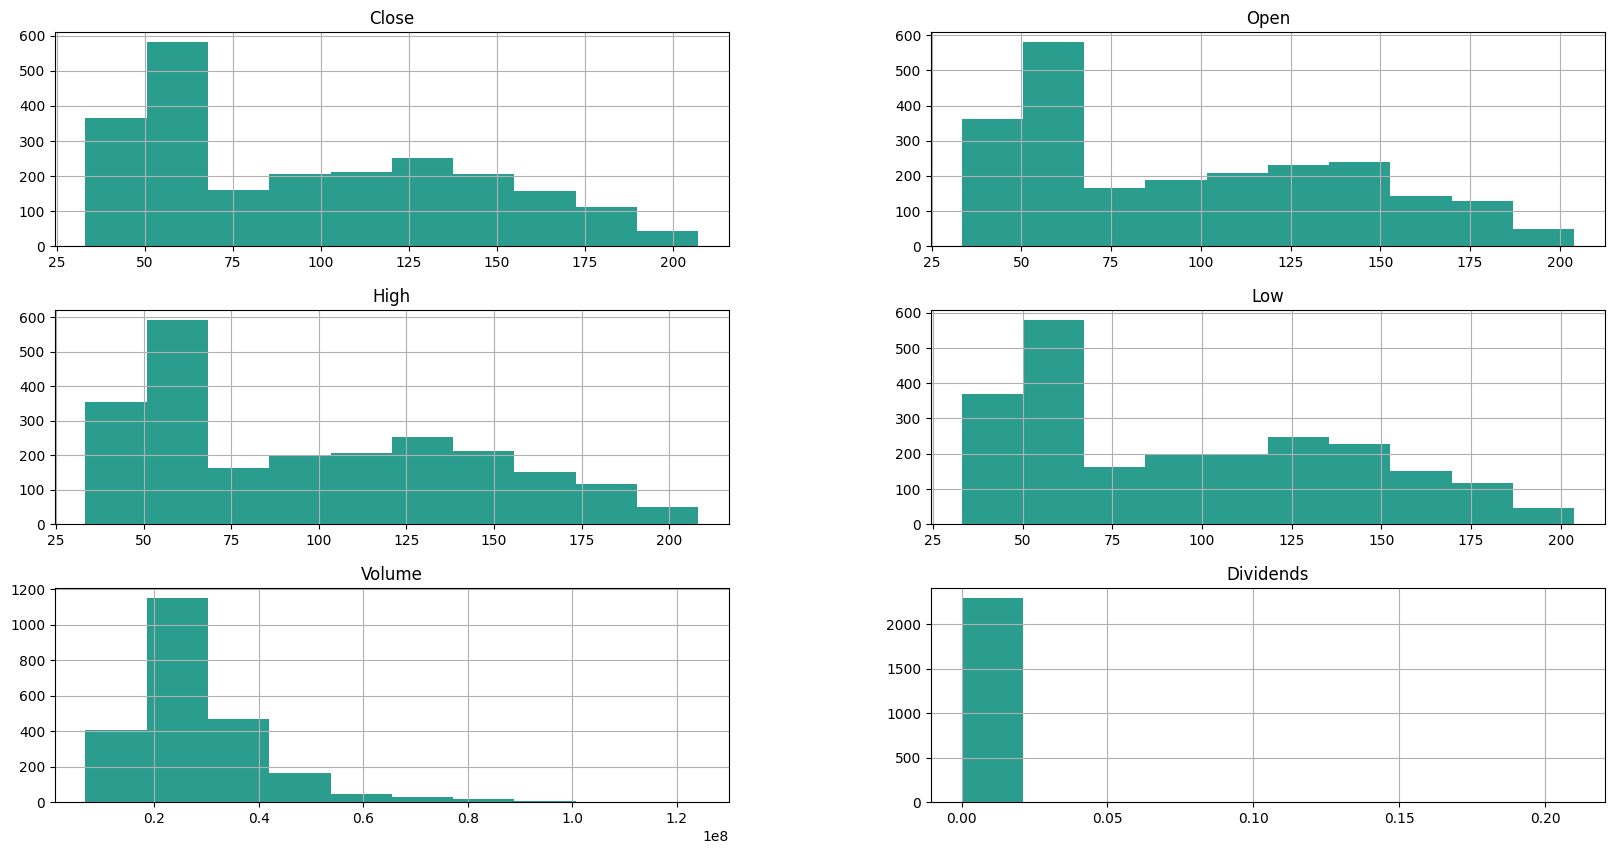

In [27]:
df1 = df.copy()
df1.drop("Stock Splits", axis=1, inplace=True)
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
hist=df1.hist(ax = ax , color= '#2a9d8f')

In [28]:
df[['Close']]

Close
Date                                 
2016-06-14 00:00:00-04:00   35.701286
2016-06-15 00:00:00-04:00   35.733593
2016-06-16 00:00:00-04:00   35.308125
2016-06-17 00:00:00-04:00   34.381630
2016-06-20 00:00:00-04:00   34.480545
...                               ...
2025-07-21 00:00:00-04:00  191.149994
2025-07-22 00:00:00-04:00  192.110001
2025-07-23 00:00:00-04:00  191.509995
2025-07-24 00:00:00-04:00  193.199997
2025-07-25 00:00:00-04:00  194.080002

[2292 rows x 1 columns]

from matplotlib import pyplot as plt
_df_0['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

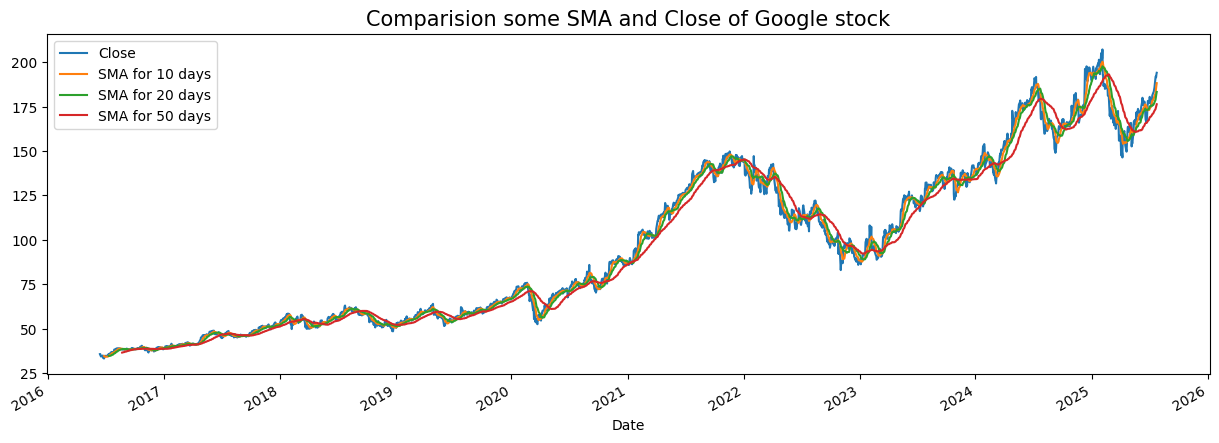

In [29]:
md = [10, 20, 50]
for SMA in md:
    col = f'SMA for {SMA} days'
    df[col] = df['Close'].rolling(SMA).mean()
df[['Close', 'SMA for 10 days', 'SMA for 20 days', 'SMA for 50 days']].plot(figsize=(15,5))
plt.title('Comparision some SMA and Close of Google stock', fontsize=15)
plt.show()

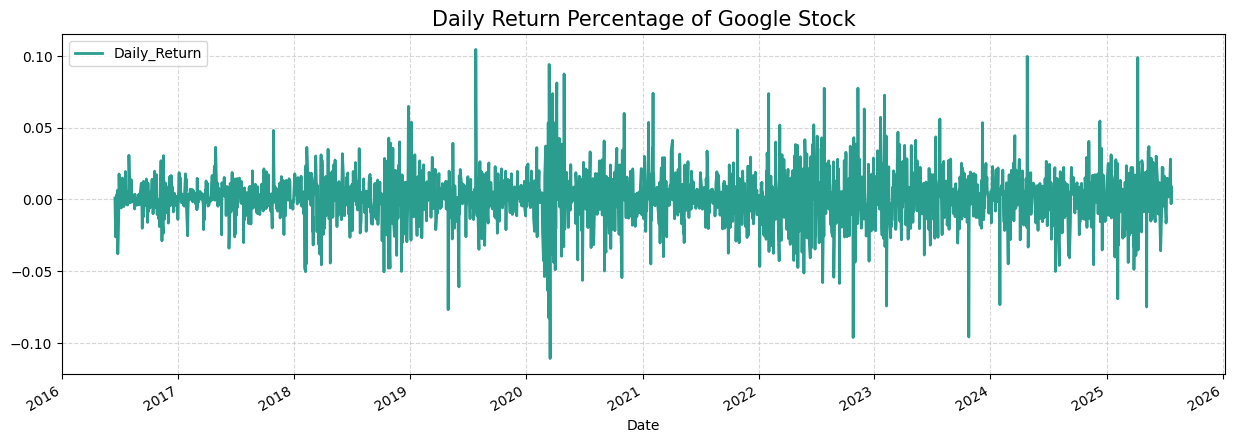

In [30]:
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'].plot(legend=True, figsize=(15, 5), color='#2a9d8f', linewidth=2)
plt.title('Daily Return Percentage of Google Stock', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [31]:
df2 = df.copy(deep=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Apply scaling to each column individually
df2['Open'] = scaler.fit_transform(df2.Open.values.reshape(-1, 1))
df2['High'] = scaler.fit_transform(df2.High.values.reshape(-1, 1))
df2['Low'] = scaler.fit_transform(df2.Low.values.reshape(-1, 1))
df2['Close'] = scaler.fit_transform(df2.Close.values.reshape(-1, 1))
df2['Volume'] = scaler.fit_transform(df2.Volume.values.reshape(-1, 1))

# Select the relevant columns for further processing
df3 = df2[['Open', 'High', 'Low', 'Volume', 'Close']].values
df3.shape

(2292, 5)

RNN


In [32]:
seq_len = 11
sequence = []
for index in range(len(df3) - seq_len + 1):
    sequence.append(df3[index: index + seq_len])
sequence = np.array(sequence)
print(sequence.shape)

(2282, 11, 5)


In [33]:
def split_data(sequence):
    train_data, test_data = train_test_split(sequence, test_size=0.2, shuffle=False)
    val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=False)
    return train_data, val_data, test_data

train_data, val_data, test_data = split_data(sequence)
print("Train:", train_data.shape, "Validation:", val_data.shape, "Test:", test_data.shape)

Train: (1825, 11, 5) Validation: (228, 11, 5) Test: (229, 11, 5)


In [34]:
x_train = train_data[:, :-1, :]
y_train = train_data[:, -1, -1]
x_valid = val_data[:, :-1, :]
y_valid = val_data[:, -1, -1]
x_test = test_data[:, :-1, :]
y_test = test_data[:, -1, -1]
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_valid shape: {x_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (1825, 10, 5)
y_train shape: (1825,)
x_valid shape: (228, 10, 5)
y_valid shape: (228,)
x_test shape: (229, 10, 5)
y_test shape: (229,)


In [35]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model_lstm.add(LSTM(units=32, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_lstm.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_valid, y_valid))

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1255 - val_loss: 0.0096
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0020 - val_loss: 0.0177
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0016 - val_loss: 0.0166
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014 - val_loss: 0.0180
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013 - val_loss: 0.0159
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015 - val_loss: 0.0131
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012 - val_loss: 0.0093
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 0.0102
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0010 - val_loss: 0.0060
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012 - val_loss: 0.0062
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - val_loss: 0.0072
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0

In [36]:
# Predict on the test data
y_pred = model_lstm.predict(x_test)

# Evaluate the predictions
test_loss = model_lstm.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023
Test Loss: 0.002562818815931678


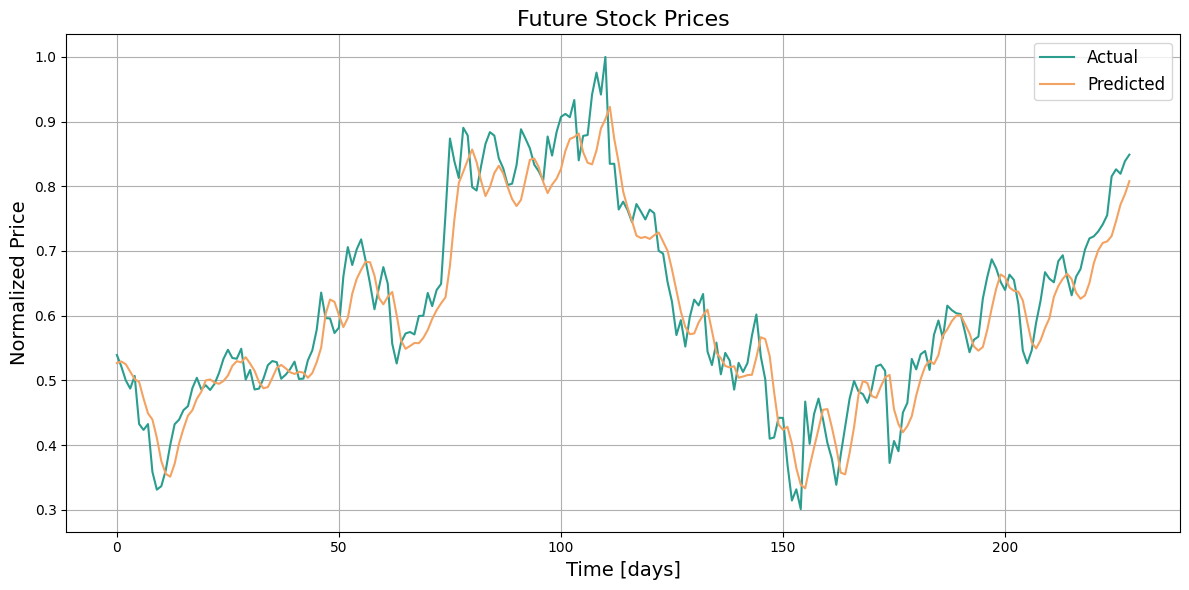

In [37]:
plt.figure(figsize=(12, 6))
idx = 0
plt.plot(y_test, color='#2a9d8f', label='Actual')
plt.plot(y_pred, color='#f4a261', label='Predicted')
plt.title('Future Stock Prices', fontsize=16)
plt.xlabel('Time [days]', fontsize=14)
plt.ylabel('Normalized Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

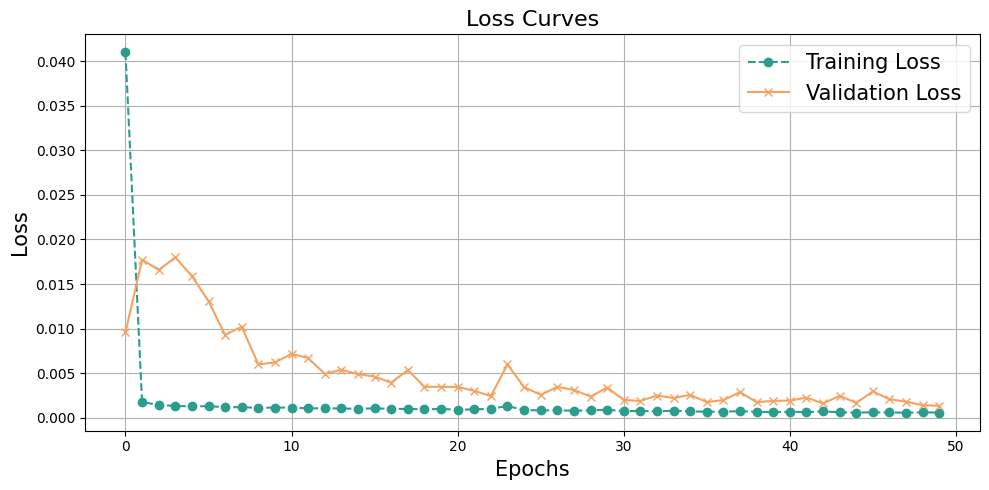

In [38]:
def plot_loss_curve(history):
    plt.figure(figsize=(10, 5))

    # Loss curve
    plt.plot(history.history['loss'], label='Training Loss', color='#2a9d8f', marker='o', linestyle='--')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='#f4a261', marker='x', linestyle='-')

    plt.title('Loss Curves', fontsize=16)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot the loss curve
plot_loss_curve(history)

In [39]:
print("### Model Summary ###")
model_lstm.summary()

### Model Summary ###


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,563 (365.48 KB)

 Trainable params: 31,187 (121.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,376 (243.66 KB)

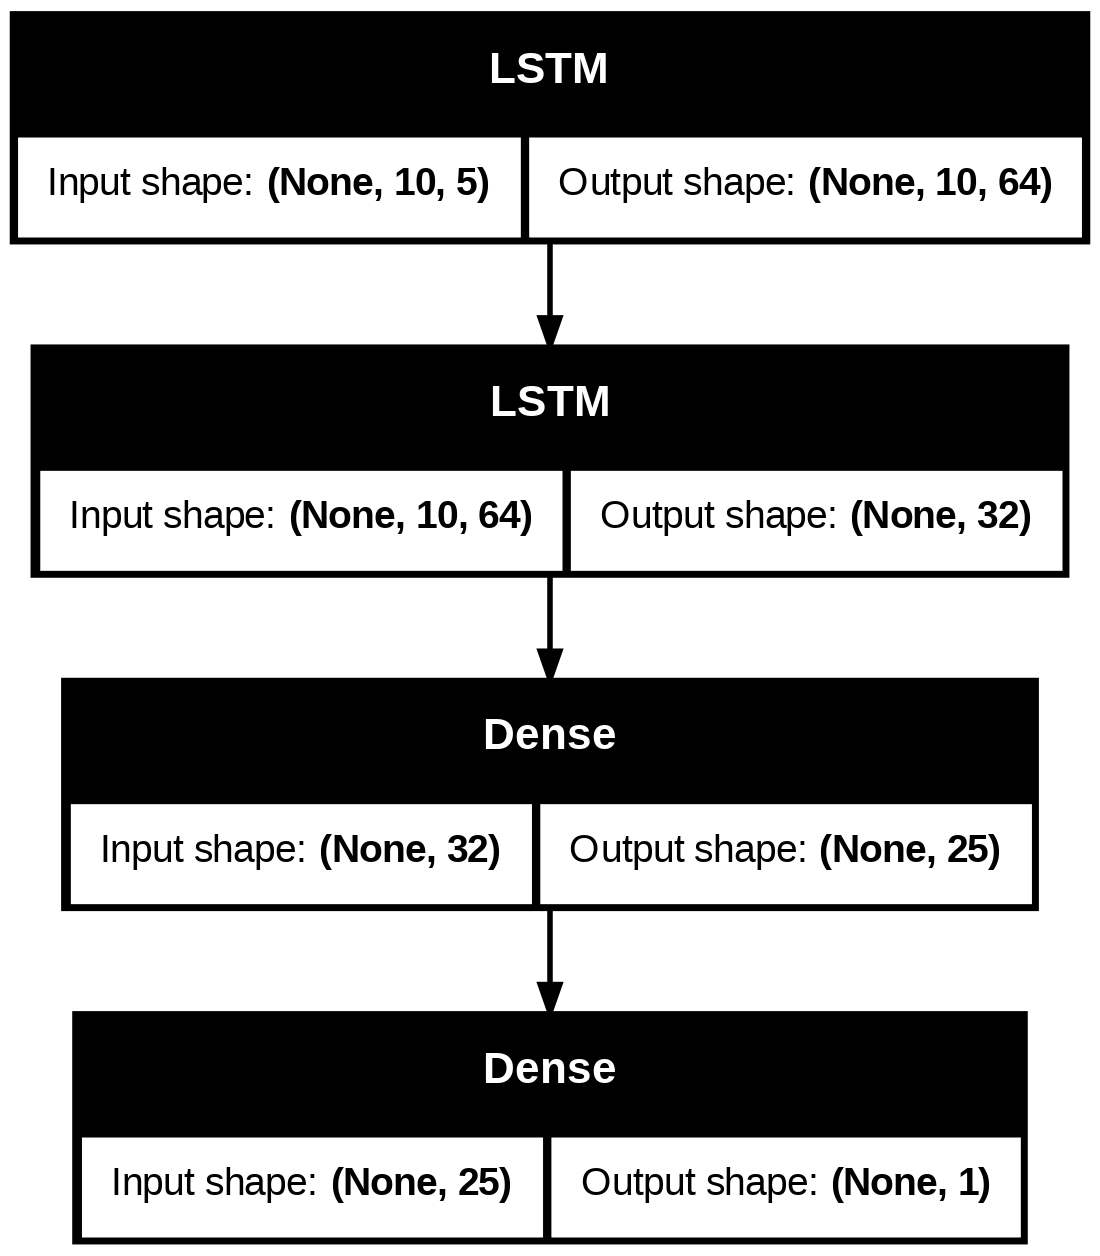

In [40]:
# Save the model architecture as an image
plot_model(model_lstm, to_file='model_architecture.png', show_shapes=True)

# Display the saved model architecture image
Image(filename='model_architecture.png')

In [41]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 796.5 kB/s eta 0:00:00


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


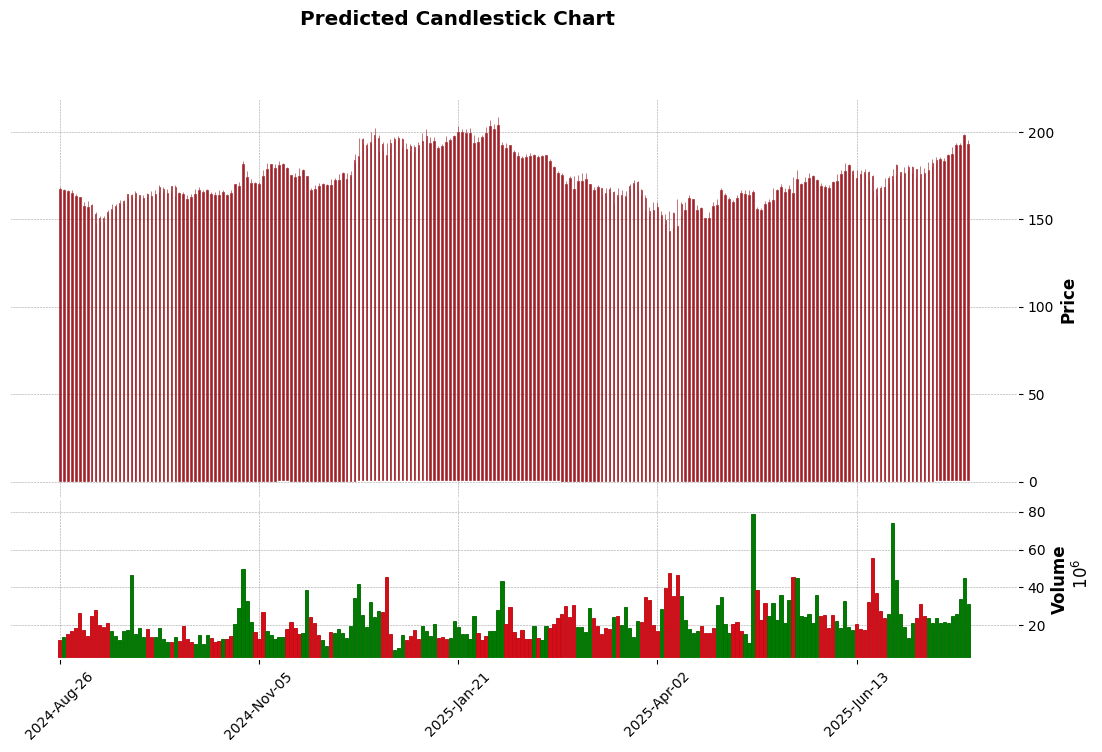

In [42]:
import mplfinance as mpf
predicted_prices = model_lstm.predict(x_test)
predicted_df = df.iloc[-len(predicted_prices):].copy()
predicted_df['Predicted Close'] = predicted_prices
predicted_df['Open'] = predicted_df['Open']
predicted_df['High'] = predicted_df['High']
predicted_df['Low'] = predicted_df['Low']
predicted_df['Close'] = predicted_df['Predicted Close']
final_df = predicted_df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
final_df.index = pd.to_datetime(predicted_df.index)
mpf.plot(
    final_df,
    type='candle',
    volume=True,
    style='charles',
    title="Predicted Candlestick Chart",
    ylabel="Price",
    ylabel_lower="Volume",
    figsize=(14, 8)
)

In [43]:
df = df.reset_index()

In [44]:
df['Date'] = pd.to_datetime(df['Date'])  # Assuming there is a column named Date
df.set_index('Date', inplace=True)

# Select prices for the candlestick
final_df = df[['Open', 'High', 'Low', 'Close']]

# Create the candlestick chart
candlestick_trace = go.Candlestick(
    x=final_df.index,
    open=final_df['Open'],
    high=final_df['High'],
    low=final_df['Low'],
    close=final_df['Close'],
    name='Candlestick',
    increasing_line_color='#2a9d8f',  # Color for increasing candles
    decreasing_line_color='#f4a261',    # Color for decreasing candles
)
# Create the figure
fig = go.Figure(data=[candlestick_trace])

# Add title and labels
fig.update_layout(
    title='Predicted Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,  # Disable the range slider below the chart
    template='plotly_white',            # Use a light template
    height=600,                         # Height of the chart
    width=1000                          # Width of the chart
)

# Show the chart
fig.show()

In [45]:
# Predicting the next 10 days
latest_prediction = []
last_seq = x_test[:-1]

for _ in range(10):
    prediction = model_lstm.predict(last_seq)
    latest_prediction.append(prediction)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [46]:
df = df.reset_index()

In [47]:
predicted_data_next = np.array(latest_prediction).reshape(-1, 5)
last_date = df['Date'].max()
next_10_days = [last_date + timedelta(days=i) for i in range(1, 11)]

# Iterate over all features
for i, feature_name in enumerate(['Open', 'High', 'Low', 'Volume', 'Close']):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=next_10_days,
        y=predicted_data_next[:, i],
        mode='lines+markers',
        name=f'Predicted {feature_name.capitalize()} Prices',
        line=dict(color='#f4a261'),
        marker=dict(color='#f4a261')
    ))
    fig.update_layout(
        title=f'Predicted {feature_name.capitalize()} Prices for the Next 10 Days',
        xaxis_title='Date',
        yaxis_title=f'{feature_name.capitalize()} Price',
        plot_bgcolor='white'
    )

    fig.show()

In [48]:
tck = yf.Ticker("GOOG")
# defining the start date
start_date = "2016-06-14"
# historical data
df5 = tck.history(start=start_date, end=None)
df5

Open        High         Low       Close  \
Date                                                                        
2016-06-14 00:00:00-04:00   35.612319   35.910048   35.445308   35.701290   
2016-06-15 00:00:00-04:00   35.737567   35.935389   35.653567   35.733589   
2016-06-16 00:00:00-04:00   35.534281   35.620769   34.955223   35.308128   
2016-06-17 00:00:00-04:00   35.223128   35.231581   34.219197   34.381630   
2016-06-20 00:00:00-04:00   34.732045   34.916450   34.465630   34.480541   
...                               ...         ...         ...         ...   
2025-07-21 00:00:00-04:00  187.100006  191.259995  187.050003  191.149994   
2025-07-22 00:00:00-04:00  192.419998  193.360001  188.494995  192.110001   
2025-07-23 00:00:00-04:00  192.360001  193.360001  190.179993  191.509995   
2025-07-24 00:00:00-04:00  198.110001  198.970001  191.949997  193.199997   
2025-07-25 00:00:00-04:00  192.929993  195.274994  192.130005  194.080002   

                             Volume  Dividends  Stock Splits  
Date                                                          
2016-06-14 00:00:00-04:00  26122000        0.0           0.0  
2016-06-15 00:00:00-04:00  24290000        0.0           0.0  
2016-06-16 00:00:00-04:00  39650000        0.0           0.0  
2016-06-17 00:00:00-04:00  68048000        0.0           0.0  
2016-06-20 00:00:00-04:00  41650000        0.0           0.0  
...                             ...        ...           ...  
2025-07-21 00:00:00-04:00  24665000        0.0           0.0  
2025-07-22 00:00:00-04:00  26212900        0.0           0.0  
2025-07-23 00:00:00-04:00  34068100        0.0           0.0  
2025-07-24 00:00:00-04:00  45252100        0.0           0.0  
2025-07-25 00:00:00-04:00  31082500        0.0           0.0  

[2292 rows x 7 columns]

In [49]:
df5 = df5.reset_index()

In [50]:
df5['Volume'] = df5['Volume'].astype('float64')

In [51]:
sma_days = [10, 20, 50]
# Calculate SMAs for each window size and add them to the dataframe
for sma in sma_days:
    col_name = f'SMA_{sma}days'
    df5[col_name] = df5['Close'].rolling(sma).mean()

In [52]:
df5['SMA_10days'] = df5['SMA_10days'].fillna(df5['Close'])
df5['SMA_20days'] = df5['SMA_20days'].fillna(df5['Close'])
df5['SMA_50days'] = df5['SMA_50days'].fillna(df5['Close'])

df5.head(15)

Date       Open       High        Low      Close  \
0  2016-06-14 00:00:00-04:00  35.612319  35.910048  35.445308  35.701290   
1  2016-06-15 00:00:00-04:00  35.737567  35.935389  35.653567  35.733589   
2  2016-06-16 00:00:00-04:00  35.534281  35.620769  34.955223  35.308128   
3  2016-06-17 00:00:00-04:00  35.223128  35.231581  34.219197  34.381630   
4  2016-06-20 00:00:00-04:00  34.732045  34.916450  34.465630  34.480541   
5  2016-06-21 00:00:00-04:00  34.713652  34.930862  34.396040  34.591381   
6  2016-06-22 00:00:00-04:00  34.746464  34.835932  34.449330  34.666939   
7  2016-06-23 00:00:00-04:00  34.666437  34.890105  34.147021  34.886127   
8  2016-06-24 00:00:00-04:00  33.559021  34.266318  33.473530  33.561508   
9  2016-06-27 00:00:00-04:00  33.351752  33.416371  32.968233  33.215561   
10 2016-06-28 00:00:00-04:00  33.747898  33.815493  33.451161  33.801079   
11 2016-06-29 00:00:00-04:00  33.948208  34.168346  33.869175  34.003380   
12 2016-06-30 00:00:00-04:00  34.070971  34.411449  33.980509  34.400513   
13 2016-07-01 00:00:00-04:00  34.405491  34.825495  34.402009  34.753918   
14 2016-07-05 00:00:00-04:00  34.597351  34.641090  34.240471  34.542179   

        Volume  Dividends  Stock Splits  SMA_10days  SMA_20days  SMA_50days  
0   26122000.0        0.0           0.0   35.701290   35.701290   35.701290  
1   24290000.0        0.0           0.0   35.733589   35.733589   35.733589  
2   39650000.0        0.0           0.0   35.308128   35.308128   35.308128  
3   68048000.0        0.0           0.0   34.381630   34.381630   34.381630  
4   41650000.0        0.0           0.0   34.480541   34.480541   34.480541  
5   29312000.0        0.0           0.0   34.591381   34.591381   34.591381  
6   23686000.0        0.0           0.0   34.666939   34.666939   34.666939  
7   43428000.0        0.0           0.0   34.886127   34.886127   34.886127  
8   88980000.0        0.0           0.0   33.561508   33.561508   33.561508  
9   52580000.0        0.0           0.0   34.652670   33.215561   33.215561  
10  43476000.0        0.0           0.0   34.462648   33.801079   33.801079  
11  38652000.0        0.0           0.0   34.289627   34.003380   34.003380  
12  31954000.0        0.0           0.0   34.198866   34.400513   34.400513  
13  26894000.0        0.0           0.0   34.236095   34.753918   34.753918  
14  29252000.0        0.0           0.0   34.242258   34.542179   34.542179

In [53]:
ten_days = df5[['Open','High','Low', 'Volume','SMA_10days','Close']].copy(deep=True)
twenty_days = df5[['Open','High','Low', 'Volume','SMA_20days','Close']].copy(deep=True)
all_sma = df5[['Open','High','Low', 'Volume','SMA_10days','SMA_20days','Close']].copy(deep=True)

In [54]:
# 10 days SMA
scaler = MinMaxScaler(feature_range=(0,2)).fit(ten_days.Low.values.reshape(-1,1))
ten_days['Open'] = scaler.transform(ten_days.Open.values.reshape(-1,1))
ten_days['High'] = scaler.transform(ten_days.High.values.reshape(-1,1))
ten_days['Low'] = scaler.transform(ten_days.Low.values.reshape(-1,1))
ten_days['Volume'] = scaler.transform(ten_days.Volume.values.reshape(-1,1))
ten_days['Close'] = scaler.transform(ten_days.Close.values.reshape(-1,1))
ten_days['SMA_10days'] = scaler.transform(ten_days['SMA_10days'].values.reshape(-1,1))

# 20 days SMA
scaler = MinMaxScaler(feature_range=(0,2)).fit(twenty_days.Low.values.reshape(-1,1))
twenty_days['Open'] = scaler.transform(twenty_days.Open.values.reshape(-1,1))
twenty_days['High'] = scaler.transform(twenty_days.High.values.reshape(-1,1))
twenty_days['Low'] = scaler.transform(twenty_days.Low.values.reshape(-1,1))
twenty_days['Volume'] = scaler.transform(twenty_days.Volume.values.reshape(-1,1))
twenty_days['Close'] = scaler.transform(twenty_days.Close.values.reshape(-1,1))
twenty_days['SMA_20days'] = scaler.transform(twenty_days['SMA_20days'].values.reshape(-1,1))

# Both 10 & 20 days SMA
scaler = MinMaxScaler(feature_range=(0,2)).fit(all_sma.Low.values.reshape(-1,1))
all_sma['Open'] = scaler.transform(all_sma.Open.values.reshape(-1,1))
all_sma['High'] = scaler.transform(all_sma.High.values.reshape(-1,1))
all_sma['Low'] = scaler.transform(all_sma.Low.values.reshape(-1,1))
all_sma['Volume'] = scaler.transform(all_sma.Volume.values.reshape(-1,1))
all_sma['Close'] = scaler.transform(all_sma.Close.values.reshape(-1,1))
all_sma['SMA_10days'] = scaler.transform(all_sma['SMA_10days'].values.reshape(-1,1))
all_sma['SMA_20days'] = scaler.transform(all_sma['SMA_20days'].values.reshape(-1,1))

In [55]:
# rescaled dataframes
data_10days = ten_days[['Open','High','Low', 'SMA_10days','Close']].values
data_20days = twenty_days[['Open','High','Low','SMA_20days','Close']].values
data_all = all_sma[['Open','High','Low', 'SMA_10days','SMA_20days','Close']].values

In [56]:
print(data_10days.shape)
print(data_20days.shape)
print(data_all.shape)

(2292, 5)
(2292, 5)
(2292, 6)


In [57]:
# using the price of the previous 10 days to predict the next day price
seq_len = 11

# 10 days SMA sequence
sequence_10days = []
for index in range(len(data_10days) - seq_len + 1):
    sequence_10days.append(data_10days[index: index + seq_len])
sequence_10days = np.array(sequence_10days)
print(sequence_10days.shape)

# 20 days SMA sequence
sequence_20days = []
for index in range(len(data_20days) - seq_len + 1):
    sequence_20days.append(data_20days[index: index + seq_len])
sequence_20days = np.array(sequence_20days)
print(sequence_20days.shape)

# Both SMAs sequence
sequence_all = []
for index in range(len(data_all) - seq_len + 1):
    sequence_all.append(data_all[index: index + seq_len])
sequence_all = np.array(sequence_all)
print(sequence_all.shape)

(2282, 11, 5)
(2282, 11, 5)
(2282, 11, 6)


In [58]:
# split data
train_data_10days, val_data_10days, test_data_10days = split_data(sequence_10days)
train_data_20days, val_data_20days, test_data_20days = split_data(sequence_20days)
train_data_all, val_data_all, test_data_all = split_data(sequence_all)

In [59]:
ORANGE = "\033[38;5;214m"
RESET = "\033[0m"

# Check shapes of the split data
print(f"{ORANGE}Shapes:\n{RESET}")
print(f"{ORANGE}10 days SMA sequence:{RESET}")
print(f"{ORANGE}Train:{RESET} {train_data_10days.shape} {ORANGE}Validation:{RESET} {val_data_10days.shape} {ORANGE}Test:{RESET} {test_data_10days.shape}")
print(f"{ORANGE}20 days SMA sequence:{RESET}")
print(f"{ORANGE}Train:{RESET} {train_data_20days.shape} {ORANGE}Validation:{RESET} {val_data_20days.shape} {ORANGE}Test:{RESET} {test_data_20days.shape}")
print(f"{ORANGE}Both SMAs sequence:{RESET}")
print(f"{ORANGE}Train:{RESET} {train_data_all.shape} {ORANGE}Validation:{RESET} {val_data_all.shape} {ORANGE}Test:{RESET} {test_data_all.shape}")

Shapes:

10 days SMA sequence:
Train: (1825, 11, 5) Validation: (228, 11, 5) Test: (229, 11, 5)
20 days SMA sequence:
Train: (1825, 11, 5) Validation: (228, 11, 5) Test: (229, 11, 5)
Both SMAs sequence:
Train: (1825, 11, 6) Validation: (228, 11, 6) Test: (229, 11, 6)


In [60]:
# Split X and Y for each dataset
def split_Xy(dataset):
    # Extract features (X) and target (Y)
    X = dataset[:, :-1, :]
    Y = dataset[:, -1, -1]   #last column (close price)
    return X, Y
# Split X and Y for each dataset
x_train_10d, y_train_10d = split_Xy(train_data_10days)
x_val_10d, y_val_10d = split_Xy(val_data_10days)
x_test_10d, y_test_10d = split_Xy(test_data_10days)
x_train_20d, y_train_20d = split_Xy(train_data_20days)
x_val_20d, y_val_20d = split_Xy(val_data_20days)
x_test_20d, y_test_20d = split_Xy(test_data_20days)
x_train_all, y_train_all = split_Xy(train_data_all)
x_val_all, y_val_all = split_Xy(val_data_all)
x_test_all, y_test_all = split_Xy(test_data_all)
print(x_train_10d.shape, y_train_10d.shape)
print(x_val_10d.shape, y_val_10d.shape)

(1825, 10, 5) (1825,)
(228, 10, 5) (228,)


In [61]:
x_train_10d = torch.tensor(x_train_10d).float()
y_train_10d = torch.tensor(y_train_10d).float()
x_val_10d = torch.tensor(x_val_10d).float()
y_val_10d = torch.tensor(y_val_10d).float()
train_set_10d = TensorDataset(x_train_10d,y_train_10d)
train_dataloader_10d = DataLoader(train_set_10d, batch_size=32, shuffle=False)
val_set_10d = TensorDataset(x_val_10d ,y_val_10d)
val_dataloader_10d = DataLoader(val_set_10d, batch_size=32, shuffle=False)


# 20 days SMA
x_train_20d = torch.tensor(x_train_20d).float()
y_train_20d = torch.tensor(y_train_20d).float()
x_val_20d = torch.tensor(x_val_20d).float()
y_val_20d = torch.tensor(y_val_20d).float()
train_set_20d = TensorDataset(x_train_20d,y_train_20d)
train_dataloader_20d = DataLoader(train_set_20d, batch_size=32, shuffle=False)
val_set_20d = TensorDataset(x_val_20d, y_val_20d)
val_dataloader_20d = DataLoader(val_set_20d, batch_size=32, shuffle=False)
# 10 & 20 days SMA
x_train_all = torch.tensor(x_train_all).float()
y_train_all = torch.tensor(y_train_all).float()
x_val_all = torch.tensor(x_val_all).float()
y_val_all = torch.tensor(y_val_all).float()
train_set_all = TensorDataset(x_train_all,y_train_all)
train_dataloader_all = DataLoader(train_set_all, batch_size=32, shuffle=False)
val_set_all = TensorDataset(x_val_all,y_val_all)
val_dataloader_all = DataLoader(val_set_all, batch_size=32, shuffle=False)

In [62]:
class NeuralNetwork(nn.Module):
    def __init__(self, num_feature):
        super(NeuralNetwork, self).__init__()
        self.lstm = nn.LSTM(num_feature, 64, batch_first=True)  # 64 represents the number of hidden units in the LSTM layer
        self.dropout = nn.Dropout(p=0.5)  # Adding Dropout layer with a dropout probability of 0.5
        self.fc = nn.Linear(64, num_feature)

    def forward(self, x):
        output, (hidden, cell) = self.lstm(x)
        x = self.dropout(hidden[-1])  # Apply dropout to the last hidden state
        x = self.fc(x)
        return x

mse = nn.MSELoss()
epochs = 50

In [63]:
def train(model, dataloader, optimizer, criterion):
    model.train()
    epoch_loss = 0

    for inputs, target in dataloader:
        optimizer.zero_grad()
        # Forward pass
        prediction = model(inputs)
        target = target.unsqueeze(-1)  # Reshape target to match prediction shape
        loss = criterion(prediction, target)  # Calculate the loss

        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        epoch_loss += loss.item()

    return epoch_loss

In [64]:
def evaluate(model, dataloader, criterion):
    model.eval()
    epoch_loss = 0

    with torch.no_grad():
        for inputs, target in dataloader:
            prediction = model(inputs)
            target = target.unsqueeze(-1)  # Reshape target to match prediction shape
            loss = criterion(prediction, target)  # Calculate the loss

            epoch_loss += loss.item()

    return epoch_loss / len(dataloader)

Model architecture saved as 'model_lstm.png'.


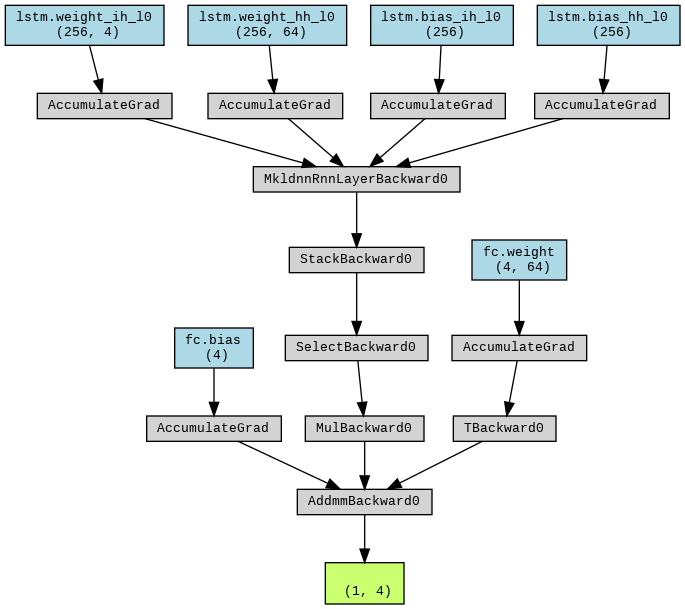

In [65]:
num_feature = 4  # Adjust this according to your features
model = NeuralNetwork(num_feature)

# Push to CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Generate a random input tensor
x = torch.randn(1, 10, num_feature).to(device)  # (batch_size, sequence_length, num_features)

# Visualize the model architecture using torchviz
try:
    y = model(x)  # Forward pass to generate graph
    graph = make_dot(y, params=dict(model.named_parameters()))
    graph.render("model_lstm", format="png")  # Save as PNG
    print("Model architecture saved as 'model_lstm.png'.")

    # Display the saved image in the Jupyter Notebook
    display(Image(filename="model_lstm.png"))
except Exception as e:
    print(f"Error plotting model architecture: {e}")

In [66]:
model_10d = NeuralNetwork(5)
optimizer = optim.Adam(model_10d.parameters())

In [67]:
train_losses = []
valid_losses = []

for epoch in range(1, epochs + 1):
    # Training
    train_loss = train(model_10d, train_dataloader_10d, optimizer, mse)
    train_losses.append(train_loss)

    # Validation
    valid_loss = evaluate(model_10d, val_dataloader_10d, mse)
    valid_losses.append(valid_loss)

    # Print epoch statistics
    print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

Epoch [1/50], Train Loss: 2.2793, Valid Loss: 0.1485
Epoch [2/50], Train Loss: 4.2467, Valid Loss: 0.1910
Epoch [3/50], Train Loss: 2.0540, Valid Loss: 0.1168
Epoch [4/50], Train Loss: 1.8030, Valid Loss: 0.0897
Epoch [5/50], Train Loss: 1.7684, Valid Loss: 0.0744
Epoch [6/50], Train Loss: 1.2427, Valid Loss: 0.0628
Epoch [7/50], Train Loss: 1.2552, Valid Loss: 0.0487
Epoch [8/50], Train Loss: 1.0497, Valid Loss: 0.0310
Epoch [9/50], Train Loss: 0.6865, Valid Loss: 0.0258
Epoch [10/50], Train Loss: 0.6840, Valid Loss: 0.0278
Epoch [11/50], Train Loss: 0.6445, Valid Loss: 0.0139
Epoch [12/50], Train Loss: 0.5623, Valid Loss: 0.0041
Epoch [13/50], Train Loss: 0.5368, Valid Loss: 0.0047
Epoch [14/50], Train Loss: 0.5335, Valid Loss: 0.0028
Epoch [15/50], Train Loss: 0.5570, Valid Loss: 0.0017
Epoch [16/50], Train Loss: 0.5542, Valid Loss: 0.0090
Epoch [17/50], Train Loss: 0.6056, Valid Loss: 0.0222
Epoch [18/50], Train Loss: 0.5573, Valid Loss: 0.0067
Epoch [19/50], Train Loss: 0.4809, Va

In [68]:
x_test_10d = torch.tensor(x_test_10d).float()
y_test_10d = torch.tensor(y_test_10d).float()

# Predict on the test data
with torch.no_grad():
    y_pred_10d = model_10d(x_test_10d)

# Convert predictions and actual test data to numpy arrays
y_pred_10d = y_pred_10d.numpy()
y_test_10d = y_test_10d.numpy()

# Reshape and select last element from prediction (closing price)
y_pred_10d = y_pred_10d.reshape(-1, y_pred_10d.shape[-1])[:, -1]

In [69]:
model_20d = NeuralNetwork(5)
optimizer = optim.Adam(model_20d.parameters())

In [70]:
train_losses = []
valid_losses = []

for epoch in range(1, epochs + 1):
    # Training
    train_loss = train(model_20d, train_dataloader_20d, optimizer, mse)
    train_losses.append(train_loss)

    # Validation
    valid_loss = evaluate(model_20d, val_dataloader_20d, mse)
    valid_losses.append(valid_loss)

    # Print epoch statistics
    print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

Epoch [1/50], Train Loss: 1.9763, Valid Loss: 0.2467
Epoch [2/50], Train Loss: 3.1988, Valid Loss: 0.2098
Epoch [3/50], Train Loss: 2.2228, Valid Loss: 0.1082
Epoch [4/50], Train Loss: 1.4619, Valid Loss: 0.1015
Epoch [5/50], Train Loss: 1.3558, Valid Loss: 0.0965
Epoch [6/50], Train Loss: 1.1269, Valid Loss: 0.0911
Epoch [7/50], Train Loss: 0.9849, Valid Loss: 0.0774
Epoch [8/50], Train Loss: 1.1201, Valid Loss: 0.0662
Epoch [9/50], Train Loss: 0.8066, Valid Loss: 0.0386
Epoch [10/50], Train Loss: 0.6743, Valid Loss: 0.0392
Epoch [11/50], Train Loss: 0.8038, Valid Loss: 0.0387
Epoch [12/50], Train Loss: 0.6865, Valid Loss: 0.0279
Epoch [13/50], Train Loss: 0.5073, Valid Loss: 0.0210
Epoch [14/50], Train Loss: 0.6434, Valid Loss: 0.0059
Epoch [15/50], Train Loss: 0.5854, Valid Loss: 0.0022
Epoch [16/50], Train Loss: 0.5563, Valid Loss: 0.0163
Epoch [17/50], Train Loss: 0.5113, Valid Loss: 0.0050
Epoch [18/50], Train Loss: 0.4979, Valid Loss: 0.0033
Epoch [19/50], Train Loss: 0.3975, Va

In [71]:
x_test_20d = torch.tensor(x_test_20d).float()
y_test_20d = torch.tensor(y_test_20d).float()

# Predict on the test data
with torch.no_grad():
    y_pred_20d = model_20d(x_test_20d)

# Convert predictions and actual test data to numpy arrays
y_pred_20d = y_pred_20d.numpy()
y_test_20d = y_test_20d.numpy()

# Reshape and select last element from prediction (closing price)
y_pred_20d = y_pred_20d.reshape(-1, y_pred_20d.shape[-1])[:, -1]

In [72]:
model_all = NeuralNetwork(6)
optimizer = optim.Adam(model_all.parameters())

In [73]:
epochs=100
train_losses = []
valid_losses = []

for epoch in range(1, epochs + 1):
    # Training
    train_loss = train(model_all, train_dataloader_all, optimizer, mse)
    train_losses.append(train_loss)

    # Validation
    valid_loss = evaluate(model_all, val_dataloader_all, mse)
    valid_losses.append(valid_loss)

    # Print epoch statistics
    print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

Epoch [1/100], Train Loss: 2.3405, Valid Loss: 0.2661
Epoch [2/100], Train Loss: 3.2595, Valid Loss: 0.2557
Epoch [3/100], Train Loss: 2.3797, Valid Loss: 0.1310
Epoch [4/100], Train Loss: 1.7252, Valid Loss: 0.1136
Epoch [5/100], Train Loss: 1.5094, Valid Loss: 0.0800
Epoch [6/100], Train Loss: 1.1138, Valid Loss: 0.0644
Epoch [7/100], Train Loss: 0.8612, Valid Loss: 0.0575
Epoch [8/100], Train Loss: 0.7370, Valid Loss: 0.0668
Epoch [9/100], Train Loss: 0.8180, Valid Loss: 0.0551
Epoch [10/100], Train Loss: 0.6426, Valid Loss: 0.0408
Epoch [11/100], Train Loss: 0.6579, Valid Loss: 0.0411
Epoch [12/100], Train Loss: 0.5705, Valid Loss: 0.0305
Epoch [13/100], Train Loss: 0.5388, Valid Loss: 0.0283
Epoch [14/100], Train Loss: 0.5367, Valid Loss: 0.0152
Epoch [15/100], Train Loss: 0.5140, Valid Loss: 0.0027
Epoch [16/100], Train Loss: 0.6120, Valid Loss: 0.0043
Epoch [17/100], Train Loss: 0.6034, Valid Loss: 0.0023
Epoch [18/100], Train Loss: 0.6639, Valid Loss: 0.0279
Epoch [19/100], Tra

In [74]:
x_test_all = torch.tensor(x_test_all).float()
y_test_all = torch.tensor(y_test_all).float()

# predict on the test data
with torch.no_grad():
    y_pred_all = model_all(x_test_all)

y_pred_all = y_pred_all.numpy()
y_test_all = y_test_all.numpy()

# reshape & select last element from prediction (closing price)
y_pred_all = y_pred_all.reshape(-1, y_pred_all.shape[-1])[:, -1]

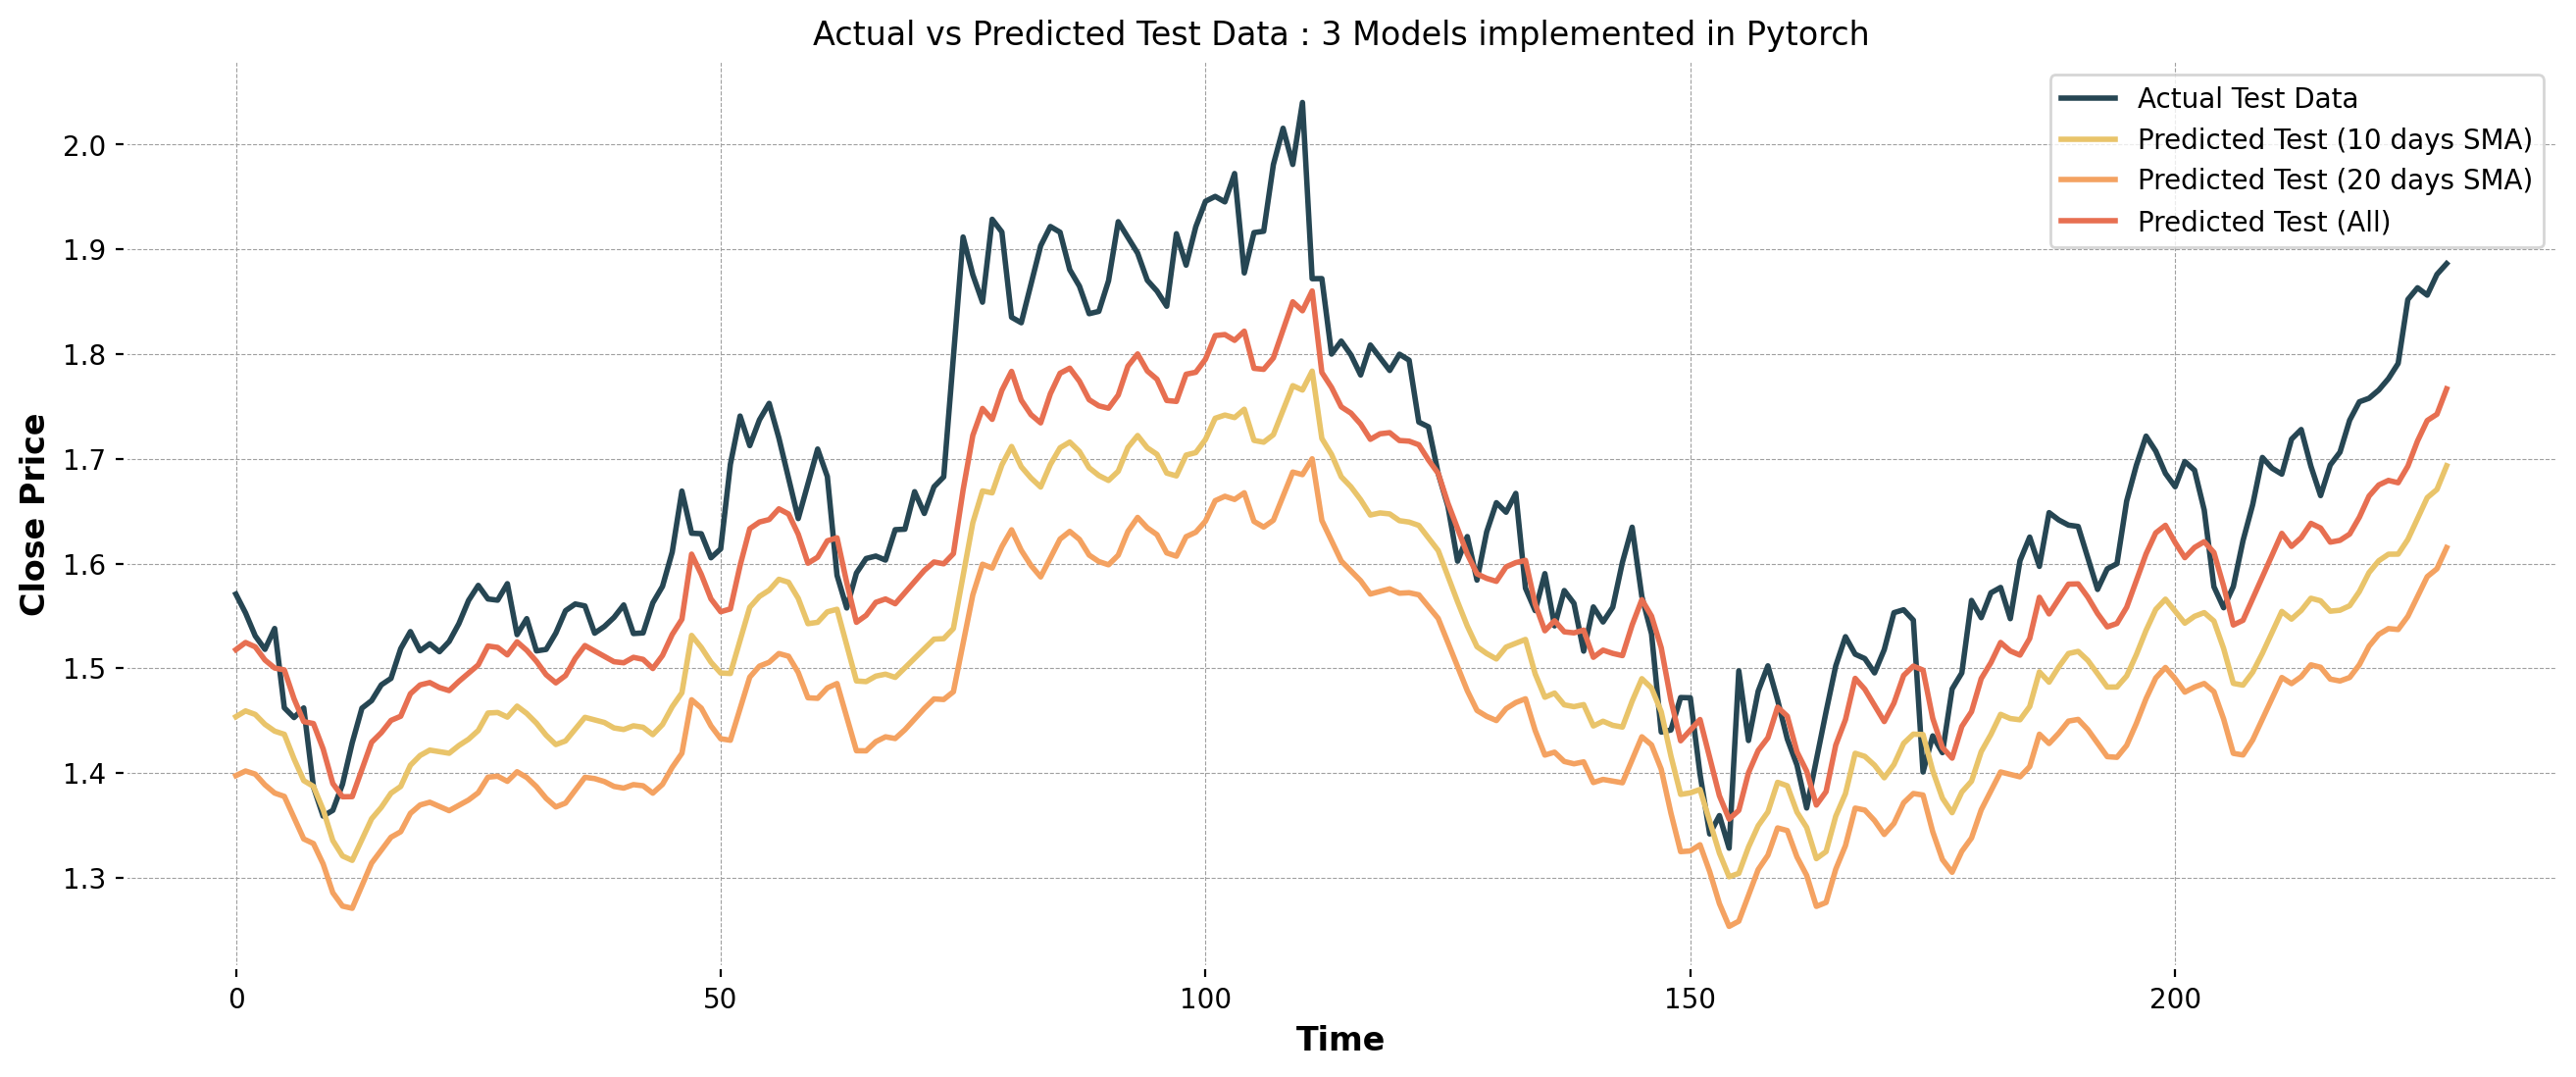

In [75]:
plt.figure(figsize=(16,6), dpi=200)

plt.plot(y_test_10d, label='Actual Test Data', color='#264653')
plt.plot(y_pred_10d, label='Predicted Test (10 days SMA)', color='#e9c46a')
plt.plot(y_pred_20d, label='Predicted Test (20 days SMA)', color='#f4a261')
plt.plot(y_pred_all, label='Predicted Test (All)', color='#e76f51')

plt.title('Actual vs Predicted Test Data : 3 Models implemented in Pytorch')
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.legend()
plt.show()

In [76]:
# Get the last sequence of data as features for predicting the next 10 days
last_sequence = sequence_all[-1:, :, :]
last_sequence = torch.from_numpy(last_sequence).float()

# Generate predictions for the next 10 days
days_num = 10
with torch.no_grad():
    for i in range(days_num):
        pred = model_all(last_sequence)  # This should be of shape (1, 1, features)

        # Reshape pred to match the dimensions of last_sequence for concatenation
        pred = pred.unsqueeze(1)  # Add sequence length dimension (1, 1, features)

        last_sequence = torch.cat((last_sequence, pred), dim=1)  # Concatenate along sequence length
        last_sequence = last_sequence[:, 1:, :]  # Keep the last sequence length of data

# Convert predictions to numpy array

predicting_days = last_sequence.squeeze().numpy()

# Inverse transform the predicted values
predicting_days = scaler.inverse_transform(predicting_days)

# Extract relevant features (Open, High, Low, Close)
predicting_days = predicting_days[:days_num, :4]

# Create a DataFrame to store the predicted prices
df_pred = pd.DataFrame(
    data=predicting_days,
    columns=['Open', 'High', 'Low', 'Close']
)

# Get the last date in the main DataFrame
last_date_in_df = df['Date'].iloc[-1]

# Generate dates for the next 10 days after the last date in the main DataFrame

next_dates = pd.date_range(start=last_date_in_df + pd.Timedelta(days=1), periods=days_num)

# Create a DataFrame with the dates
df_dates = pd.DataFrame({'Date': next_dates})

# Concatenate the two DataFrames
df_combined = pd.concat([df_dates, df_pred], axis=1)

print(df_combined)

                       Date        Open        High         Low       Close
0 2025-07-26 00:00:00-04:00  192.929993  195.274994  192.130005  188.237000
1 2025-07-27 00:00:00-04:00  183.395309  183.391220  183.380447  183.380035
2 2025-07-28 00:00:00-04:00  177.484863  177.476746  177.472366  177.471375
3 2025-07-29 00:00:00-04:00  172.520111  172.510162  172.508560  172.507523
4 2025-07-30 00:00:00-04:00  168.335526  168.325027  168.324524  168.323883
5 2025-07-31 00:00:00-04:00  164.774155  164.763504  164.763535  164.763367
6 2025-08-01 00:00:00-04:00  161.710358  161.699677  161.700073  161.700302
7 2025-08-02 00:00:00-04:00  159.047882  159.037262  159.037918  159.038498
8 2025-08-03 00:00:00-04:00  156.713333  156.702774  156.703674  156.704498
9 2025-08-04 00:00:00-04:00  154.650116  154.639633  154.640732  154.641769
